# Group Project

--------
__Authors:__  Turakulov A., Sitdikova Y., Rakhimkulova A., Yakovlev P.

__Group:__ BASB212

--------


For the task we have chosen fast food industry and the brand __McDonald’s__. The considered competitors of the brand are leading fast food restaurants: Burger King, KFC, Subway.
We have parsed the data from the App Store reviews on the restaurant's applications

--------
Steps of the analysis:
1. Modules importing
2. Parsing data and some preprocessing
3. Text preprocesssing and data vizalization
4. Semantic analysis
5. Reputational metrics
6. Conclusions 

# Modules importing

Firstly, we have installed all of the required libraries for the analysis.

In [ ]:
# for data parsing from appstore
!pip install app_store_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#contractions package to expand the contraction in English such as we'll -> we will or we shouldn't've -> we should not have
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#correct mistakes
!pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from app_store_scraper import AppStore 
import pandas as pd 
import numpy as np
import json

# for preprocessing
import contractions

#
import regex
import emoji
from collections import Counter
import re

# for tokenization and vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# for sentiment analysis
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('brown')
nltk.download("stopwords")
nltk.download('vader_lexicon')

from num2words import num2words
import string
from textblob import TextBlob
from nltk.corpus import stopwords , wordnet , brown
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.express as px
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim.corpora import Dictionary, corpora
from gensim.models import CoherenceModel, LsiModel, HdpModel, LdaMulticore
from gensim.corpora.dictionary import Dictionary

# Import the wordcloud library
from wordcloud import WordCloud

import pyLDAvis.gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Parsing data and some preprocessing

We have parsed the reviews from the App store using app_store_scraper module. From each of the brands application pages (McDonald's and competitors) have been parsed around 2000 reviews. All of the brand reviews files have been saved to csv format and joined together.


In [ ]:
mcd = AppStore(country="us", app_name="McDonald's") 
mcd.review(how_many=2000)
df_MC = pd.DataFrame(np.array(mcd.reviews),columns=['review']) 
df_MC = df_MC.join(pd.DataFrame(df_MC.pop('review').tolist())) 
df_MC['Company_name'] = 'McDonalds'
df_MC

,date,isEdited,title,rating,review,userName,developerResponse,Company_name
0,2020-07-02 13:47:03,False,Terrible service,5,I work at a large hospital and walk by McDonal...,Christa@TGH,NaN,McDonalds
1,2022-11-02 17:52:33,False,Frequent user,3,"As a busy graduate student, this app was a lif...",AndreaBurns3,NaN,McDonalds
2,2021-08-11 15:33:01,False,Don’t turn your screen off,2,I recently had to place an order three times b...,Jennysub,NaN,McDonalds
3,2021-04-16 17:23:43,False,Unable to Even Use the App,1,I don’t even know what more to do about this a...,Ashhart1020,NaN,McDonalds
4,2021-09-28 00:13:38,False,"Terribly designed app, many stores not fully t...",2,"For starters, I’m generally against fast food ...",$aver of cash,"{'id': 25556930, 'body': 'We want to make the ...",McDonalds
...,...,...,...,...,...,...,...,...
1995,2020-05-29 12:52:35,False,Takes FOREVER to load.,2,"Every single time I login on my phone, via gma...",AFW0815,"{'id': 15669279, 'body': 'We're sorry you are ...",McDonalds
1996,2020-05-29 07:09:53,False,Works 50% or less of the time,2,I’ve been using the app for over 2 yrs now and...,Ana Evans,"{'id': 15657508, 'body': 'We're sorry about yo...",McDonalds
1997,2019-11-06 16:34:43,False,Faster going through drive through,4,App works great and I had no issues ordering. ...,808 Teine Samoa,NaN,McDonalds
1998,2019-11-04 04:05:39,False,I have to agree,3,I have to agree with most of the users saying ...,Inifinte Loading Fries,"{'id': 11698619, 'body': 'Thanks for reaching ...",McDonalds


In [ ]:
# df_MC.shape

(2000, 8)

In [ ]:
# df_MC.to_csv('App Store Review McDonalds.csv')

In [ ]:
# df_KFC = AppStore(country="us", app_name="KFC") 
# df_KFC.review(how_many= 2000)
# df_KFC = pd.DataFrame(np.array(df_KFC.reviews),columns=['review']) 
# df_KFC = df_KFC.join(pd.DataFrame(df_KFC.pop('review').tolist())) 
# df_KFC['Company_name'] = 'KFC'
# df_KFC

,userName,review,title,rating,isEdited,date,developerResponse
0,Madison7015,Since when has KFC had an app?! I feel the nee...,"I am a s t o u n d e d! Flabbergasted, really.",5,False,2021-03-16 04:05:43,NaN
1,Tj hhii,The app desperately needs work. It’s missing a...,It works kinda,1,False,2021-06-26 19:40:24,NaN
2,ponchinator,Awful app does not change wait time what so ev...,I would delete it twice if I could,2,False,2021-10-09 14:36:04,NaN
3,fastpitchdad13,Placing the order took a little while to figur...,The KFC APP IS WORTH IT,5,False,2021-12-11 20:31:23,"{'id': 26804346, 'body': 'Thank you for the 5-..."
4,ThrownAwayAlready,I ordered and fully paid for my food through t...,Just call in your order,1,False,2021-05-09 09:35:24,NaN
...,...,...,...,...,...,...,...
409,I guess every name is taken,"I downloaded the app, selected the closest sto...",WORST APP EVER!!!,1,False,2021-12-05 22:06:34,"{'id': 26718650, 'body': 'Hi, we apologize for..."
410,realllyMAD geandma,Ruined party. I ordered food for my grandsons ...,Ruined party!,1,False,2021-10-17 23:47:31,"{'id': 25910728, 'body': 'Oh no! We sincerely ..."
411,The baker goods,I thought this would be a quick and easy way t...,Worst food app in the world,1,False,2021-10-10 13:20:35,NaN
412,Khaleesi127,I typed in the zip code where I am and it show...,Wrong,1,False,2021-08-06 20:38:09,"{'id': 24413571, 'body': 'Thank you for your f..."


In [ ]:
# df_KFC.to_csv('App Store Review KFC.csv')

In [ ]:
# df_Subway = AppStore(country="us", app_name="Subway") 
# df_Subway.review(how_many= 2000)
# df_Subway = pd.DataFrame(np.array(df_Subway.reviews),columns=['review']) 
# df_Subway = df_Subway.join(pd.DataFrame(df_Subway.pop('review').tolist())) 
# df_Subway['Company_name'] = 'Subway'
# df_Subway

,title,isEdited,userName,date,rating,review,developerResponse,Company_name
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway
...,...,...,...,...,...,...,...,...
1995,App map too stupid,False,RaplhCramden,2022-06-05 15:56:10,4,I can scan for location on map but stores are ...,NaN,Subway
1996,My first online order,False,foodonlyOK,2022-04-22 15:58:53,4,Order was not completely accurate as I was giv...,NaN,Subway
1997,Horrible,False,rtdoug,2022-02-23 17:31:49,1,I ordered a sub online and the subway said the...,NaN,Subway
1998,Please allow multi payment options!,False,35yroldaddict,2022-01-16 00:03:17,3,Love the app except one thing… when I have a g...,NaN,Subway


In [ ]:
# df_Subway.to_csv('App Store Review Subway.csv')

In [ ]:
# df_BK = AppStore(country="us", app_name="BURGER KING® App") 
# df_BK.review(how_many= 2000)
# df_BK = pd.DataFrame(np.array(df_BK.reviews),columns=['review']) 
# df_BK = df_BK.join(pd.DataFrame(df_BK.pop('review').tolist())) 
# df_BK['Company_name'] = 'Burger King'
# df_BK

,rating,title,review,date,isEdited,userName,developerResponse,Company_name
0,5,Will only order delivery with the app!,We are avid DoorDash customers and order from ...,2021-03-20 19:31:26,False,Ugh!l!,NaN,Burger King
1,4,What’s up?,What’s up Burger King? I’m 70 and been eating ...,2022-02-01 21:44:43,False,Al 2525,NaN,Burger King
2,1,WORST FOOD APP EVER,I know this won’t be seen through all the fake...,2022-08-13 11:05:11,False,hlr83,"{'id': 31451207, 'body': 'We’re bummed to hear...",Burger King
3,5,Technical Issues with App,EDIT: I was contacted a day after writing my r...,2020-06-22 06:29:36,True,EFRCZBNKFd,"{'id': 16032427, 'body': 'We’re bummed to hear...",Burger King
4,1,Frustrating and useless,I’ve been using the app on and off for about a...,2020-12-14 22:06:32,False,Papaericano,"{'id': 19792049, 'body': 'We’re bummed to hear...",Burger King
...,...,...,...,...,...,...,...,...
1995,2,Won’t let me purchase.,Trouble with payment from the app. Never have...,2020-07-18 22:58:58,False,Similuis,"{'id': 16720489, 'body': 'We’re bummed to hear...",Burger King
1996,5,Online app and delivery,The app is very user friendly and the delivery...,2020-06-30 21:26:26,False,Beth740,NaN,Burger King
1997,5,Most variety,Probably the only app to have this many coupon...,2020-05-29 17:46:46,False,i-m.batman was lame,NaN,Burger King
1998,1,Useless App,App doesn’t allow me to place an order for del...,2020-06-28 18:53:53,False,My nickname isn't available,"{'id': 16267866, 'body': 'We’re bummed to hear...",Burger King


In [ ]:
# df_BK.to_csv('App Store Review Burger King.csv')

In [ ]:
df_Subway = pd.read_csv('/content/drive/MyDrive/marketing task/App Store Review Subway.csv')
df_Mcdonalds = pd.read_csv('/content/drive/MyDrive/marketing task/App Store Review McDonalds.csv')
df_Burger_King = pd.read_csv('/content/drive/MyDrive/marketing task/App Store Review Burger King.csv')
df_KFC = pd.read_csv('/content/drive/MyDrive/marketing task/App Store Review KFC.csv')

In [ ]:
df_Subway = df_Subway.drop('Unnamed: 0', axis=1)
df_Mcdonalds = df_Mcdonalds.drop('Unnamed: 0', axis=1)
df_Burger_King = df_Burger_King.drop('Unnamed: 0', axis=1)
df_KFC = df_KFC.drop('Unnamed: 0', axis=1)

In [ ]:
df_Burger_King

,rating,title,review,date,isEdited,userName,developerResponse,Company_name
0,5,Will only order delivery with the app!,We are avid DoorDash customers and order from ...,2021-03-20 19:31:26,False,Ugh!l!,NaN,Burger King
1,4,What’s up?,What’s up Burger King? I’m 70 and been eating ...,2022-02-01 21:44:43,False,Al 2525,NaN,Burger King
2,1,WORST FOOD APP EVER,I know this won’t be seen through all the fake...,2022-08-13 11:05:11,False,hlr83,"{'id': 31451207, 'body': 'We’re bummed to hear...",Burger King
3,5,Technical Issues with App,EDIT: I was contacted a day after writing my r...,2020-06-22 06:29:36,True,EFRCZBNKFd,"{'id': 16032427, 'body': 'We’re bummed to hear...",Burger King
4,1,Frustrating and useless,I’ve been using the app on and off for about a...,2020-12-14 22:06:32,False,Papaericano,"{'id': 19792049, 'body': 'We’re bummed to hear...",Burger King
...,...,...,...,...,...,...,...,...
1995,2,Won’t let me purchase.,Trouble with payment from the app. Never have...,2020-07-18 22:58:58,False,Similuis,"{'id': 16720489, 'body': 'We’re bummed to hear...",Burger King
1996,5,Online app and delivery,The app is very user friendly and the delivery...,2020-06-30 21:26:26,False,Beth740,NaN,Burger King
1997,5,Most variety,Probably the only app to have this many coupon...,2020-05-29 17:46:46,False,i-m.batman was lame,NaN,Burger King
1998,1,Useless App,App doesn’t allow me to place an order for del...,2020-06-28 18:53:53,False,My nickname isn't available,"{'id': 16267866, 'body': 'We’re bummed to hear...",Burger King


In [ ]:
df_Subway['developerResponse'] = df_Subway['developerResponse'].str.replace("\'", "\"")
df_Subway['developerResponse'] = df_Subway['developerResponse'].str.replace("xa0", "")

df_Subway['developerId'] = np.nan
df_Subway['developerBody'] = np.nan
df_Subway['developerModified'] = np.nan
for i in range(df_Subway.shape[0]):
    if df_Subway['developerResponse'].isna().iloc[i] == False:
        try:
            json_dict = json.loads(df_Subway['developerResponse'].iloc[i])
            df_Subway['developerId'].iloc[i] = json_dict['id']
            df_Subway['developerBody'].iloc[i] = json_dict['body']
            df_Subway['developerModified'].iloc[i] = json_dict['modified']
        except:
            df_Subway['developerId'].iloc[i] = np.nan
            df_Subway['developerBody'].iloc[i] = np.nan
            df_Subway['developerModified'].iloc[i] = np.nan

df_Subway.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN


In [ ]:
df_Subway[(df_Subway['developerResponse'].isna() == False) & (df_Subway['developerId'].isna() == True)]

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified
7,Simply doesn’t work!,False,Anita245,2019-10-03 16:02:24,1,I would give a 0 star rating if I could. The a...,"{""id"": 11151738, ""body"": ""Hey, there- we\""re w...",Subway,NaN,NaN,NaN
16,Horrible at choosing location,False,Nerdy0907,2019-10-27 03:47:39,1,"I have a subway right across from my job, we w...","{""id"": 11560194, ""body"": ""We apologize for any...",Subway,NaN,NaN,NaN
18,Needs a location improvement,False,Rich and Kiki,2020-01-24 04:09:29,1,If you use different subway locations (you tra...,"{""id"": 13211430, ""body"": ""Hi, there. We are so...",Subway,NaN,NaN,NaN
20,Subway support helped solve accessibility issu...,True,Brl.Dots,2020-01-24 09:44:27,5,"THANKS to Subway phone tech support, we figure...","{""id"": 13084802, ""body"": ""Hi, there. We are so...",Subway,NaN,NaN,NaN
24,Did not work,False,lynandfrank,2019-12-08 19:22:36,5,This app would be great for big orders “when” ...,"{""id"": 12776128, ""body"": ""We apologize for any...",Subway,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1915,Better app navigation,False,TX8604,2019-01-01 00:28:37,4,The app can be difficult to navigate. I have o...,"{""id"": 6643234, ""body"": ""Your feedback is real...",Subway,NaN,NaN,NaN
1916,Didn’t work for me,False,pt7753,2018-12-05 14:42:52,1,I kept being told I can go on line and use my ...,"{""id"": 6340521, ""body"": ""Hello! You can earn t...",Subway,NaN,NaN,NaN
1971,Missing rewards,False,ZentzVB,2019-11-19 18:01:41,3,I always have issues with my rewards. I got an...,"{""id"": 12755959, ""body"": ""We appreciate you sh...",Subway,NaN,NaN,NaN
1982,Pointless,False,4iQK,2018-07-15 12:57:53,1,I enjoy going to subway however this rewards a...,"{""id"": 4255795, ""body"": ""Hi there- you can ear...",Subway,NaN,NaN,NaN


In [ ]:
df_Mcdonalds['developerResponse'] = df_Mcdonalds['developerResponse'].str.replace("\'", "\"")
df_Mcdonalds['developerResponse'] = df_Mcdonalds['developerResponse'].str.replace("xa0", "")

df_Mcdonalds['developerId'] = np.nan
df_Mcdonalds['developerBody'] = np.nan
df_Mcdonalds['developerModified'] = np.nan
for i in range(df_Mcdonalds.shape[0]):
    if df_Mcdonalds['developerResponse'].isna().iloc[i] == False:
        try:
            json_dict = json.loads(df_Mcdonalds['developerResponse'].iloc[i])
            df_Mcdonalds['developerId'].iloc[i] = json_dict['id']
            df_Mcdonalds['developerBody'].iloc[i] = json_dict['body']
            df_Mcdonalds['developerModified'].iloc[i] = json_dict['modified']
        except:
            df_Mcdonalds['developerId'].iloc[i] = np.nan
            df_Mcdonalds['developerBody'].iloc[i] = np.nan
            df_Mcdonalds['developerModified'].iloc[i] = np.nan

df_Mcdonalds.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,isEdited,title,rating,review,userName,developerResponse,Company_name,developerId,developerBody,developerModified
0,2020-07-02 13:47:03,False,Terrible service,5,I work at a large hospital and walk by McDonal...,Christa@TGH,NaN,McDonalds,NaN,NaN,NaN
1,2022-11-02 17:52:33,False,Frequent user,3,"As a busy graduate student, this app was a lif...",AndreaBurns3,NaN,McDonalds,NaN,NaN,NaN
2,2021-08-11 15:33:01,False,Don’t turn your screen off,2,I recently had to place an order three times b...,Jennysub,NaN,McDonalds,NaN,NaN,NaN
3,2021-04-16 17:23:43,False,Unable to Even Use the App,1,I don’t even know what more to do about this a...,Ashhart1020,NaN,McDonalds,NaN,NaN,NaN
4,2021-09-28 00:13:38,False,"Terribly designed app, many stores not fully t...",2,"For starters, I’m generally against fast food ...",$aver of cash,"{""id"": 25556930, ""body"": ""We want to make the ...",McDonalds,25556930.0,We want to make the best Mobile App we can. He...,2021-10-07T21:52:33Z


In [ ]:
df_Mcdonalds[(df_Mcdonalds['developerResponse'].isna() == False) & (df_Mcdonalds['developerId'].isna() == True)]

,date,isEdited,title,rating,review,userName,developerResponse,Company_name,developerId,developerBody,developerModified
6,2022-06-04 16:39:23,False,Poor connection protocol,5,About a month ago I began experiencing problem...,vpgck,"{""id"": 30195480, ""body"": ""we""re here to help y...",McDonalds,NaN,NaN,NaN
7,2021-11-19 19:57:33,True,“Upgraded” but still far from perfect,2,It’s mind-boggling how an app is promoted for ...,B1G82307,"{""id"": 10574860, ""body"": ""We""re sorry to hear ...",McDonalds,NaN,NaN,NaN
9,2022-10-14 02:04:05,False,This app is awful,1,I have spent the last several months trying to...,Eddie 615,"{""id"": 32590822, ""body"": ""let""s get you logged...",McDonalds,NaN,NaN,NaN
10,2018-07-02 03:21:26,False,It’s coming along,4,Regular updates actually do make improvements ...,Britain W.,"{""id"": 4110001, ""body"": ""We""re so excited you ...",McDonalds,NaN,NaN,NaN
11,2022-04-18 06:43:41,False,This App and McDonald’s is garbage,1,So I had a lovely experience with this app yet...,goobertron12!,"{""id"": 29265054, ""body"": ""we don""t like that o...",McDonalds,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1993,2020-09-07 17:25:45,False,Can no longer use app,3,I’ve had the McDonald’s app for years and love...,beccajo97,"{""id"": 17847959, ""body"": ""We""re sorry about th...",McDonalds,NaN,NaN,NaN
1994,2020-02-21 21:48:07,False,Didn’t know my phone had to physically be there,4,I don’t know if they would’ve gotten the order...,Tazlvr58,"{""id"": 13641887, ""body"": ""Thanks for reaching ...",McDonalds,NaN,NaN,NaN
1995,2020-05-29 12:52:35,False,Takes FOREVER to load.,2,"Every single time I login on my phone, via gma...",AFW0815,"{""id"": 15669279, ""body"": ""We""re sorry you are ...",McDonalds,NaN,NaN,NaN
1996,2020-05-29 07:09:53,False,Works 50% or less of the time,2,I’ve been using the app for over 2 yrs now and...,Ana Evans,"{""id"": 15657508, ""body"": ""We""re sorry about yo...",McDonalds,NaN,NaN,NaN


In [ ]:
df_Burger_King['developerResponse'] = df_Burger_King['developerResponse'].str.replace("\'", "\"")
df_Burger_King['developerResponse'] = df_Burger_King['developerResponse'].str.replace("xa0", "")

df_Burger_King['developerId'] = np.nan
df_Burger_King['developerBody'] = np.nan
df_Burger_King['developerModified'] = np.nan
for i in range(df_Burger_King.shape[0]):
    if df_Burger_King['developerResponse'].isna().iloc[i] == False:
        try:
            json_dict = json.loads(df_Burger_King['developerResponse'].iloc[i])
            df_Burger_King['developerId'].iloc[i] = json_dict['id']
            df_Burger_King['developerBody'].iloc[i] = json_dict['body']
            df_Burger_King['developerModified'].iloc[i] = json_dict['modified']
        except:
            df_Burger_King['developerId'].iloc[i] = np.nan
            df_Burger_King['developerBody'].iloc[i] = np.nan
            df_Burger_King['developerModified'].iloc[i] = np.nan

df_Burger_King.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rating,title,review,date,isEdited,userName,developerResponse,Company_name,developerId,developerBody,developerModified
0,5,Will only order delivery with the app!,We are avid DoorDash customers and order from ...,2021-03-20 19:31:26,False,Ugh!l!,NaN,Burger King,NaN,NaN,NaN
1,4,What’s up?,What’s up Burger King? I’m 70 and been eating ...,2022-02-01 21:44:43,False,Al 2525,NaN,Burger King,NaN,NaN,NaN
2,1,WORST FOOD APP EVER,I know this won’t be seen through all the fake...,2022-08-13 11:05:11,False,hlr83,"{""id"": 31451207, ""body"": ""We’re bummed to hear...",Burger King,31451207.0,We’re bummed to hear that you didn’t have the ...,2022-08-14T18:04:08Z
3,5,Technical Issues with App,EDIT: I was contacted a day after writing my r...,2020-06-22 06:29:36,True,EFRCZBNKFd,"{""id"": 16032427, ""body"": ""We’re bummed to hear...",Burger King,16032427.0,We’re bummed to hear that you didn’t have the ...,2020-06-22T06:29:36Z
4,1,Frustrating and useless,I’ve been using the app on and off for about a...,2020-12-14 22:06:32,False,Papaericano,"{""id"": 19792049, ""body"": ""We’re bummed to hear...",Burger King,19792049.0,We’re bummed to hear that you didn’t have the ...,2020-12-16T02:26:32Z


In [ ]:
df_Burger_King[(df_Burger_King['developerResponse'].isna() == False) & (df_Burger_King['developerId'].isna() == True)]

,rating,title,review,date,isEdited,userName,developerResponse,Company_name,developerId,developerBody,developerModified
1879,1,$9.99 for extra lettuce?,When I placed an order yesterday I used the pl...,2021-03-04 10:30:35,False,Texx010,"{""id"": 21549756, ""body"": ""Hi Texx010,Thank you...",Burger King,NaN,NaN,NaN


In [ ]:
df_KFC['developerResponse'] = df_KFC['developerResponse'].str.replace("\'", "\"")
df_KFC['developerResponse'] = df_KFC['developerResponse'].str.replace("xa0", "")

df_KFC['developerId'] = np.nan
df_KFC['developerBody'] = np.nan
df_KFC['developerModified'] = np.nan
for i in range(df_KFC.shape[0]):
    if df_KFC['developerResponse'].isna().iloc[i] == False:
        try:
            json_dict = json.loads(df_KFC['developerResponse'].iloc[i])
            df_KFC['developerId'].iloc[i] = json_dict['id']
            df_KFC['developerBody'].iloc[i] = json_dict['body']
            df_KFC['developerModified'].iloc[i] = json_dict['modified']
        except:
            df_KFC['developerId'].iloc[i] = np.nan
            df_KFC['developerBody'].iloc[i] = np.nan
            df_KFC['developerModified'].iloc[i] = np.nan

df_KFC.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,userName,review,title,rating,isEdited,date,developerResponse,Company_name,developerId,developerBody,developerModified
0,Madison7015,Since when has KFC had an app?! I feel the nee...,"I am a s t o u n d e d! Flabbergasted, really.",5,False,2021-03-16 04:05:43,NaN,KFC,NaN,NaN,NaN
1,Tj hhii,The app desperately needs work. It’s missing a...,It works kinda,1,False,2021-06-26 19:40:24,NaN,KFC,NaN,NaN,NaN
2,ponchinator,Awful app does not change wait time what so ev...,I would delete it twice if I could,2,False,2021-10-09 14:36:04,NaN,KFC,NaN,NaN,NaN
3,fastpitchdad13,Placing the order took a little while to figur...,The KFC APP IS WORTH IT,5,False,2021-12-11 20:31:23,"{""id"": 26804346, ""body"": ""Thank you for the 5-...",KFC,26804346.0,Thank you for the 5-star review and happy you ...,2021-12-13T13:39:18Z
4,ThrownAwayAlready,I ordered and fully paid for my food through t...,Just call in your order,1,False,2021-05-09 09:35:24,NaN,KFC,NaN,NaN,NaN


In [ ]:
df_KFC[(df_KFC['developerResponse'].isna() == False) & (df_KFC['developerId'].isna() == True)].count()

userName             32
review               32
title                32
rating               32
isEdited             32
date                 32
developerResponse    32
Company_name         32
developerId           0
developerBody         0
developerModified     0
dtype: int64

In [ ]:
df_Subway.isna().sum()

title                   0
isEdited                0
userName                0
date                    0
rating                  0
review                  0
developerResponse    1613
Company_name            0
developerId          1789
developerBody        1789
developerModified    1789
dtype: int64

In [ ]:
df_Mcdonalds.isna().sum()

date                    0
isEdited                0
title                   0
rating                  0
review                  0
userName                0
developerResponse     800
Company_name            0
developerId          1683
developerBody        1683
developerModified    1683
dtype: int64

In [ ]:
df_Burger_King.isna().sum()

rating                  0
title                   0
review                  0
date                    0
isEdited                0
userName                0
developerResponse    1150
Company_name            0
developerId          1151
developerBody        1151
developerModified    1151
dtype: int64

In [ ]:
df_KFC.isna().sum()

userName               0
review                 0
title                  0
rating                 0
isEdited               0
date                   0
developerResponse    337
Company_name           0
developerId          369
developerBody        369
developerModified    369
dtype: int64

In [ ]:
df_renewed = pd.concat([df_Subway, df_KFC, df_Mcdonalds, df_Burger_King])

In [ ]:
df_renewed

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,Won’t let me purchase.,False,Similuis,2020-07-18 22:58:58,2,Trouble with payment from the app. Never have...,"{""id"": 16720489, ""body"": ""We’re bummed to hear...",Burger King,16720489.0,We’re bummed to hear that you didn’t have the ...,2020-07-19T03:00:27Z
1996,Online app and delivery,False,Beth740,2020-06-30 21:26:26,5,The app is very user friendly and the delivery...,NaN,Burger King,NaN,NaN,NaN
1997,Most variety,False,i-m.batman was lame,2020-05-29 17:46:46,5,Probably the only app to have this many coupon...,NaN,Burger King,NaN,NaN,NaN
1998,Useless App,False,My nickname isn't available,2020-06-28 18:53:53,1,App doesn’t allow me to place an order for del...,"{""id"": 16267866, ""body"": ""We’re bummed to hear...",Burger King,16267866.0,We’re bummed to hear that you didn’t have the ...,2020-06-28T22:16:22Z


In [ ]:
df_renewed.describe()

,rating,developerId
count,6414.000000,1.422000e+03
mean,2.578890,1.962637e+07
std,1.629755,9.014494e+06
min,1.000000,5.872140e+05
25%,1.000000,1.575783e+07
50%,2.000000,2.104882e+07
75%,4.000000,2.611701e+07
max,5.000000,3.360363e+07


#Text preprocessing

For further analysis, the data needs to be put in order, we have to process emoji, punctiations, abbreviations, typos, acronyms.

In [ ]:
df_renewed["review_clean"] = df_renewed["review"].apply(lambda x: x.lower())
display(df_renewed.head())

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,"i used this app a lot for the rewards program,..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition (places...
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless. i...
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 5:20pm on the app for picku...


In [ ]:
df_renewed["review_clean"] = df_renewed["review_clean"].apply(lambda x: contractions.fix(x))

#  check
print(df_renewed["review"][1998])
print(df_renewed["review_clean"][1998])

1998    Love the app except one thing… when I have a g...
1998    I have to agree with most of the users saying ...
1998    App doesn’t allow me to place an order for del...
Name: review, dtype: object
1998    love the app except one thing… when i have a g...
1998    i have to agree with most of the users saying ...
1998    app does not allow me to place an order for de...
Name: review_clean, dtype: object


In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [ ]:
text = df_renewed['review_clean']
emoji_list= [] 
for t in text:
  emoji_list=emoji_list+split_count(t)

In [ ]:

print(Counter(emoji_list))

Counter({'😡': 29, '🤬': 24, '🙄': 22, '👎': 18, '😂': 17, '🤔': 14, '❤️': 13, '👍': 12, '®': 11, '⭐️': 11, '👎🏼': 8, '😊': 7, '😘': 7, '‼️': 7, '🍔': 7, '☹️': 6, '👍🏻': 6, '🤷🏻\u200d♀️': 6, '😍': 5, '💜': 5, '😁': 5, '😄': 5, '🤦\u200d♂️': 4, '😕': 4, '😀': 4, '😢': 4, '😃': 4, '😋': 4, '😔': 4, '🤤': 4, '😠': 4, '😑': 4, '😭': 4, '🤣': 3, '🤗': 3, '🤷🏼\u200d♀️': 3, '🥗': 3, '🙏🏽': 3, '🙃': 3, '😤': 3, '🙂': 3, '😣': 3, '🤦🏻\u200d♂️': 3, '🧐': 3, '♥️': 3, '🙏🏻': 3, '👑': 3, '🙁': 2, '💯': 2, '🤨': 2, '⁉️': 2, '💕': 2, '😉': 2, '🤷\u200d♀️': 2, '🤷\u200d♂️': 2, '🙌': 2, '😩': 2, '🤦🏻\u200d♀️': 2, '😆': 2, '😞': 2, '🍟': 2, '😳': 2, '😐': 2, '👍🏽': 2, '🥇': 2, '👍🏼': 2, '😏': 2, '😬': 1, '🥪': 1, '🤪': 1, '👏': 1, '😖': 1, '🙋🏻\u200d♀️': 1, '🙅🏾\u200d♀️': 1, '🤷🏿\u200d♂️': 1, '✅': 1, '🥰': 1, '😻': 1, '😪': 1, '📱': 1, '🖕🏼': 1, '™️': 1, '☠️': 1, '😎': 1, '🤓': 1, '🥺': 1, '⛔️': 1, '😅': 1, '🤷🏾\u200d♂️': 1, '👋': 1, '💗': 1, '😫': 1, '😒': 1, '🤞🏽': 1, '🤩': 1, '🤯': 1, '🏆': 1, '🤷🏼\u200d♂️': 1, '😱': 1, '😟': 1, '☺️': 1, '\U0001fab3': 1, '✌️': 1, '❤️\u200d🔥': 1, '🤴🏽': 1,

We can see different emoji's here. Let's remove them

In [ ]:
#Remove special characters:The special characters could be symbols, emojis, and other graphic characters

def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
#!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#tweet = """\
#i mean like the missing guacamole in the turkey bacon guac wrap 🤦\u200d
#... """

In [ ]:
#import demoji
#demoji.findall(tweet)

{'🤦': 'person facepalming'}

In [ ]:
df_renewed["review_clean"] = df_renewed["review_clean"].apply(lambda x: remove_special_characters(x))
display(df_renewed.head())

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,"i used this app a lot for the rewards program,..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition (places...
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless. i...
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 5:20pm on the app for picku...


In [ ]:
#remove n's
df_renewed['review_clean'] = df_renewed['review_clean'].replace(r'\s+|\\n', ' ', regex=True) 

In [ ]:
display(df_renewed["review"].values[2000])

"Since when has KFC had an app?! I feel the need to hop in my cream/tan (it's like the color of a perfectly toasted marshmallow) jeep and get a chicken sandwich and some coleslaw. The app is so clean and so... so... desirable! \nCould it have a kids menu? Yes. Could it give me the option to remove ice from my drink? Yes. Could the developer make it a little more personalized? Like a 'good morning, I hope you get that promotion today' (bc I know the internet knows all my info anyways 🙄).. yes \nBut overall, I give the app 5 stars in general. But for the sake of specificity, I give it 4.765 stars. \nYou all should be proud of yourselves, mucho props (it was about time) and my 2021 has definitely gotten better from the discovery of this app and all that is has to offer \nIt's even better than Barack Obama eating pineapple on his pizza... I said what I said 🤷🏻\u200d♀️"

In [ ]:
display(df_renewed["review_clean"].values[2000])

"since when has kfc had an app?! i feel the need to hop in my cream/tan (it is like the color of a perfectly toasted marshmallow) jeep and get a chicken sandwich and some coleslaw. the app is so clean and so... so... desirable! could it have a kids menu? yes. could it give me the option to remove ice from my drink? yes. could the developer make it a little more personalized? like a 'good morning, i hope you get that promotion today' (because i know the internet knows all my info anyways ).. yes but overall, i give the app 5 stars in general. but for the sake of specificity, i give it 4.765 stars. you all should be proud of yourselves, mucho props (it was about time) and my 2021 has definitely gotten better from the discovery of this app and all that is has to offer it is even better than barack obama eating pineapple on his pizza... i said what i said 🤷\u200d"

In [ ]:
#convert num to words
def num_to_words(text):
    '''
    Convert Numbers to Words
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string with converted Numbers to Words
    ''' 
    after_spliting = text.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words

In [ ]:
df_renewed["review_clean"] = df_renewed["review_clean"].apply(lambda x: num_to_words(x))

In [ ]:
display(df_renewed["review"].values[4])

'Placed an order at 5:20pm on the app for pickup at the Menominee, MI Subway. Completed the transaction and it told me it would be ready for pickup at 8:20pm. Three hours?!!! Called the store 20 minutes later to see if was really going to take that long. They haven’t gotten the order! She said it usually takes 15 minutes for the store to receive it. So they should have already gotten it. She said once they received the order that they would have it ready in 15-20 minutes. I called back in 25 minutes and they still hadn’t received the order! She asked me to give her my order over the phone and they would make it right away. I went to the store 20 minutes later and showed the woman my phone with the order details which show date, time, order number, store number, location, items ordered, amount paid, method of payment. Everything to prove it’s legit. I appreciate the employees willingness to resolve things, but the app is COMPLETE GARBAGE!!! The store had no way to look up my order, no w

In [ ]:
display(df_renewed["review_clean"].values[4])

'placed an order at 5:20pm on the app for pickup at the menominee, mi subway. completed the transaction and it told me it would be ready for pickup at 8:20pm. three hours?!!! called the store twenty minutes later to see if was really going to take that long. they have not gotten the order! she said it usually takes fifteen minutes for the store to receive it. so they should have already gotten it. she said once they received the order that they would have it ready in 15-20 minutes. i called back in twenty-five minutes and they still had not received the order! she asked me to give her my order over the phone and they would make it right away. i went to the store twenty minutes later and showed the woman my phone with the order details which show date, time, order number, store number, location, items ordered, amount paid, method of payment. everything to prove it is legit. i appreciate the employees willingness to resolve things, but the app is complete garbage!!! the store had no way 

In [ ]:
#remove punctuation
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
df_renewed["review_clean"] = df_renewed["review_clean"].apply(lambda x: remove_punct(x))
#check
print(df_renewed["review"][5])
print(df_renewed["review_clean"][5])

5    Are used this app about three days ago and it ...
5    I had to say that my experience was definitely...
5    I’ve been using this app for a couple months n...
5    Dear reader : please excuse my hangry tone. Th...
Name: review, dtype: object
5    are used this app about three days ago and it ...
5    i had to say that my experience was definitely...
5    i have been using this app for a couple months...
5    dear reader  please excuse my hangry tone ther...
Name: review_clean, dtype: object


In [ ]:
#check slang, typos, acronyms
def other_clean(text):
    sample_abbr = eval(open("/content/convert.txt").read())
    sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
    text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
    return text

In [ ]:
df_renewed["review_clean"] = df_renewed["review_clean"].apply(lambda x: other_clean(x))

In [ ]:
#change bc to because
display(df_renewed["review"].values[2000])

"Since when has KFC had an app?! I feel the need to hop in my cream/tan (it's like the color of a perfectly toasted marshmallow) jeep and get a chicken sandwich and some coleslaw. The app is so clean and so... so... desirable! \nCould it have a kids menu? Yes. Could it give me the option to remove ice from my drink? Yes. Could the developer make it a little more personalized? Like a 'good morning, I hope you get that promotion today' (bc I know the internet knows all my info anyways 🙄).. yes \nBut overall, I give the app 5 stars in general. But for the sake of specificity, I give it 4.765 stars. \nYou all should be proud of yourselves, mucho props (it was about time) and my 2021 has definitely gotten better from the discovery of this app and all that is has to offer \nIt's even better than Barack Obama eating pineapple on his pizza... I said what I said 🤷🏻\u200d♀️"

In [ ]:
#change bc to because
display(df_renewed["review_clean"].values[2000])

'since when has kfc had an application i feel the need to hop in my creamtan it is like the color of a perfectly toasted marshmallow jeep and get a chicken sandwich and some coleslaw the application is so clean and so so desirable could it have a kids menu yes could it give me the option to remove ice from my drink yes could the developer make it a little more personalized like a good morning i hope you get that promotion today because i know the internet knows all my info anyways  yes but overall i give the application 5 stars in general but for the sake of specificity i give it 4765 stars you all should be proud of yourselves mucho props it was about time and my 2021 has definitely gotten better from the discovery of this application and all that is has to offer it is even better than barack obama eating pineapple on his pizza i said what i said 🤷\u200d'

In [ ]:
df_renewed['review_clean'].apply(lambda x: str(TextBlob(x).correct()))

KeyboardInterrupt: ignored

In [ ]:
print(df_renewed["review"][5])
print(df_renewed["review_clean"][5])

5    Are used this app about three days ago and it ...
5    I had to say that my experience was definitely...
5    I’ve been using this app for a couple months n...
5    Dear reader : please excuse my hangry tone. Th...
Name: review, dtype: object
5    are used this application about three days ago...
5    i had to say that my experience was definitely...
5    i have been using this application for a coupl...
5    dear reader  please excuse my hangry tone ther...
Name: review_clean, dtype: object


In [ ]:
#let's tokenize our column
df_renewed['tokenized'] = df_renewed['review_clean'].apply(word_tokenize)
df_renewed.head()

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean,tokenized
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p..."
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta..."
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa..."
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic..."


In [ ]:
# Removing stopwords.
stop = set(stopwords.words('english'))
df_renewed['stopwords_removed'] = df_renewed['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df_renewed.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li..."
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw..."
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat..."
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me..."


Stemming is a process of extracting a root word - identifying a common stem among various forms (e.g., singular and plural noun form) of a word, for example, the words. We will use snowball stemmer. It's better than Porter stemming

In [ ]:
def snowball_stemmer(text):
    """
        Stem words in list of tokenized words with SnowballStemmer
    """
    stemmer = nltk.SnowballStemmer("english")
    stems = [stemmer.stem(i) for i in text]
    return stems

In [ ]:
df_renewed['snowball_stemmer'] = df_renewed['stopwords_removed'].apply(lambda x: snowball_stemmer(x))
df_renewed.head()

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ..."
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway..."
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time..."
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine..."


In [ ]:
df_renewed.head()

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ..."
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway..."
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time..."
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Won’t let me purchase.,False,Similuis,2020-07-18 22:58:58,2,Trouble with payment from the app. Never have...,"{""id"": 16720489, ""body"": ""We’re bummed to hear...",Burger King,16720489.0,We’re bummed to hear that you didn’t have the ...,2020-07-19T03:00:27Z,trouble with payment from the application neve...,"[trouble, with, payment, from, the, applicatio...","[trouble, payment, application, never, problem...","[troubl, payment, applic, never, problem, appl..."
1996,Online app and delivery,False,Beth740,2020-06-30 21:26:26,5,The app is very user friendly and the delivery...,NaN,Burger King,NaN,NaN,NaN,the application is very user friendly and the ...,"[the, application, is, very, user, friendly, a...","[application, user, friendly, delivery, faster...","[applic, user, friend, deliveri, faster, went,..."
1997,Most variety,False,i-m.batman was lame,2020-05-29 17:46:46,5,Probably the only app to have this many coupon...,NaN,Burger King,NaN,NaN,NaN,probably the only application to have this man...,"[probably, the, only, application, to, have, t...","[probably, application, many, coupons, offers,...","[probabl, applic, mani, coupon, offer, avail, ..."
1998,Useless App,False,My nickname isn't available,2020-06-28 18:53:53,1,App doesn’t allow me to place an order for del...,"{""id"": 16267866, ""body"": ""We’re bummed to hear...",Burger King,16267866.0,We’re bummed to hear that you didn’t have the ...,2020-06-28T22:16:22Z,application does not allow me to place an orde...,"[application, does, not, allow, me, to, place,...","[application, allow, place, order, delivery, a...","[applic, allow, place, order, deliveri, abl, p..."


In [ ]:
#pos taging
#This is the critical stage for many NLP applications since, by identifying the POS of a word, we can infer its contextual meaning.
wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }
    
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    pos_tagged_text = t2.tag(text)
    
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ]
    return pos_tagged_text

In [ ]:
df_renewed['combined_postag_wnet'] = df_renewed['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

df_renewed.head()

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,..."
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des..."
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ..."
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica..."


Lemmatization is the task of determining that two words have the same root, despite their surface differences. For example good, better, the same

In [ ]:
def lemmatize_word(text):
    """
        Lemmatize the tokenized words
    """

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [ ]:
lemmatizer = WordNetLemmatizer()

df_renewed['lemmatize_word_w_pos'] = df_renewed['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
df_renewed['lemmatize_word_w_pos'] = df_renewed['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
df_renewed['lemmatize_text'] = [' '.join(map(str, l)) for l in df_renewed['lemmatize_word_w_pos']] # join back to text

df_renewed.head()

,title,isEdited,userName,date,rating,review,developerResponse,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",NaN,Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[use, application, lot, reward, program, use, ...",use application lot reward program use mobile ...
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,NaN,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,NaN,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, subwa...",already problem start desire order subway sand...
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,NaN,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,NaN,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...


In [ ]:
#check
print(df_renewed["review"][8])
print(df_renewed["combined_postag_wnet"][8])
print(df_renewed["lemmatize_word_w_pos"][8])

NameError: ignored

#Data viz

In [ ]:
#Subway
subway_df = df_renewed[df_renewed['Company_name'] == 'Subway'] 
top = Counter([item for sublist in subway_df['lemmatize_word_w_pos'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,application,4025
1,order,3531
2,get,1459
3,subway,1356
4,use,1351
5,time,1350
6,sandwich,1157
7,go,1150
8,store,1060
9,make,852


In [ ]:
#Mcdonalds
Mcdonalds_df = df_renewed[df_renewed['Company_name'] == 'McDonalds'] 
top = Counter([item for sublist in Mcdonalds_df['lemmatize_word_w_pos'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,application,6044
1,order,5178
2,get,2388
3,use,2292
4,time,2123
5,go,1847
6,’,1389
7,deal,1219
8,would,1159
9,say,1138


In [ ]:
#KFC
KFC_df = df_renewed[df_renewed['Company_name'] == 'KFC'] 
top = Counter([item for sublist in KFC_df['lemmatize_word_w_pos'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,application,456
1,order,363
2,get,156
3,go,124
4,time,121
5,kfc,116
6,try,92
7,store,83
8,use,82
9,say,80


In [ ]:
#BK
df_Burger_King = df_renewed[df_renewed['Company_name'] == 'Burger King'] 
top = Counter([item for sublist in df_Burger_King['lemmatize_word_w_pos'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,application,3712
1,order,2906
2,get,1381
3,use,1257
4,time,1213
5,go,1055
6,try,841
7,burger,751
8,work,748
9,food,672


In [ ]:
top = Counter([item for sublist in df_renewed['lemmatize_word_w_pos'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,application,14237
1,order,11978
2,get,5384
3,use,4982
4,time,4807
5,go,4176
6,try,2865
7,would,2687
8,work,2640
9,say,2383


In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
df = df_renewed.groupby(['Company_name','rating'])['rating'].count()
df

Company_name  rating
Burger King   1         854
              2         249
              3         232
              4         157
              5         508
KFC           1         283
              2          45
              3          31
              4          18
              5          37
McDonalds     1         889
              2         293
              3         272
              4         185
              5         361
Subway        1         701
              2         217
              3         242
              4         295
              5         545
Name: rating, dtype: int64

In [ ]:
averages = df_renewed.groupby('Company_name')['rating'].mean()
print(averages)

Company_name
Burger King    2.608000
KFC            1.746377
McDonalds      2.418000
Subway         2.883000
Name: rating, dtype: float64


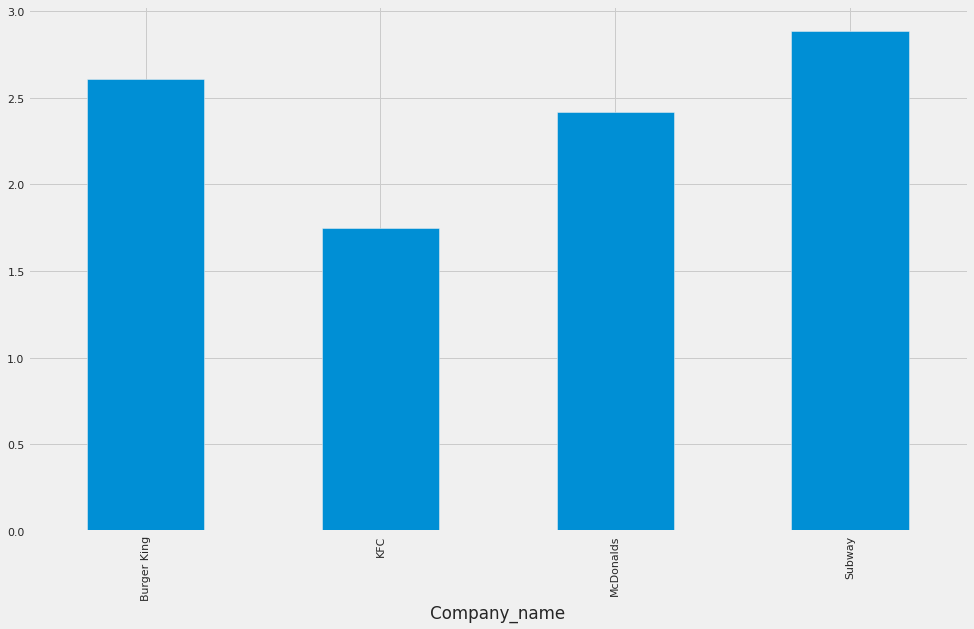

In [ ]:
averages = df_renewed.groupby('Company_name')['rating'].mean().plot.bar()

In [ ]:
df_renewed['num_words_in_review']=df_renewed['lemmatize_text'].str.split().map(lambda x: len(x))

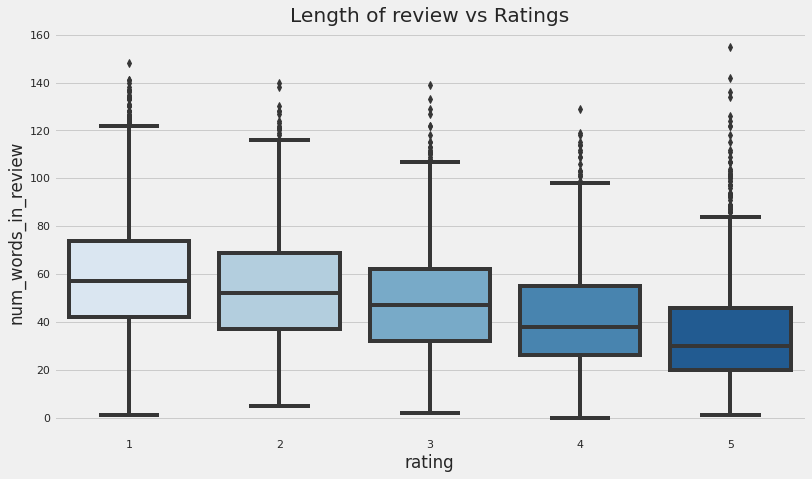

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.boxplot(df_renewed['rating'], df_renewed['num_words_in_review'], palette = 'Blues')
plt.title("Length of review vs Ratings")
plt.show()

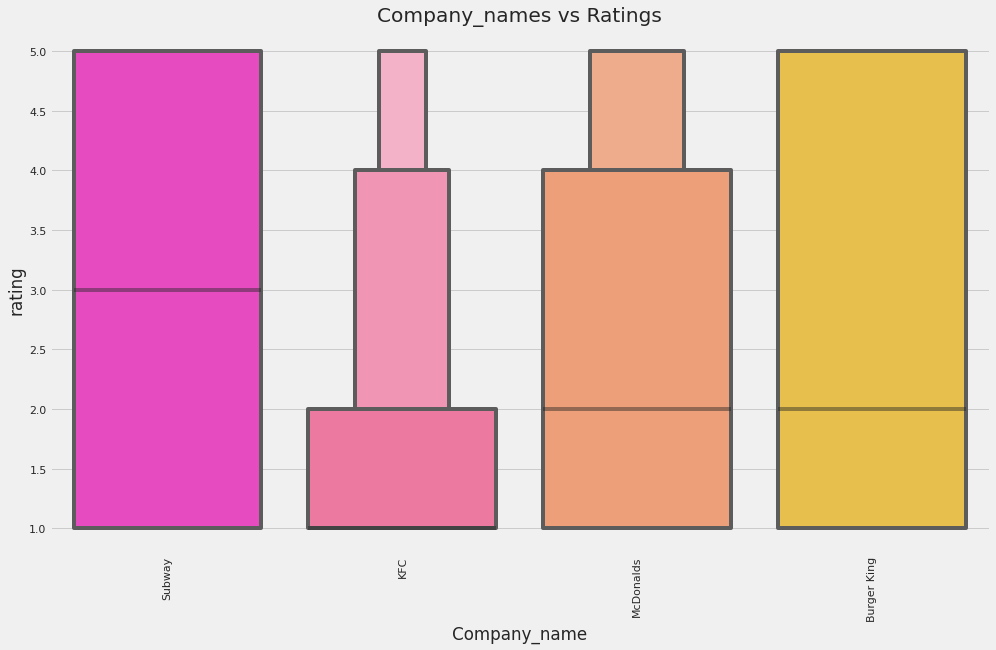

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(df_renewed['Company_name'], df_renewed['rating'], palette = 'spring')
plt.title("Company_names vs Ratings")
plt.xticks(rotation = 90)
plt.show()

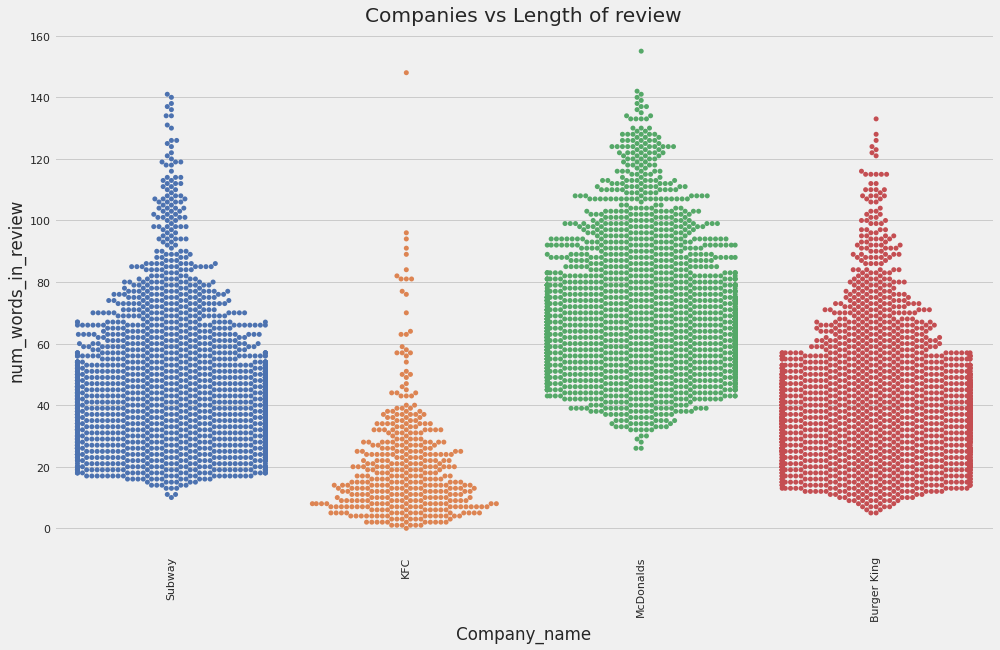

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.swarmplot(df_renewed['Company_name'], df_renewed['num_words_in_review'], palette = 'deep')
plt.title("Companies vs Length of review")
plt.xticks(rotation = 90)
plt.show()

#Feature extraction

In [ ]:
#Bag of Words/ Bag of n-grams
def cv(data, ngram = 1, MAX_NB_WORDS = 75000):
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = count_vectorizer.fit_transform(data).toarray()
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    return emb, count_vectorizer

In [ ]:
def print_out(emb, feat, ngram, compared_sentence=0):
    print(ngram,"bag-of-words: ")
    print(feat.get_feature_names(), "\n")
    print(ngram,"bag-of-feature: ")
    print(test_cv_1gram.vocabulary_, "\n")
    print("BoW matrix:")
    print(pd.DataFrame(emb.transpose(), index = feat.get_feature_names()).head(), "\n")
    print(ngram,"vector example:")
    print(df_renewed["lemmatize_text"][compared_sentence])
    print(emb[compared_sentence], "\n")

In [ ]:
test_corpus = df_renewed["lemmatize_text"][:5].tolist()
print("The test corpus: ", test_corpus, "\n")

test_cv_em_1gram, test_cv_1gram = cv(test_corpus, ngram=1)
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Uni-gram")

The test corpus:  ['use application lot reward program use mobile ordering even since covid restriction town select item menu indicate specific bread meat topping sauce love even indicate whether want regular amount would rather topping le amount also add “ make meal ” side item individually great make item select favorite put name make easy next time ordering family go favorite find item already build suit person additionally automatically earn point toward reward token later turn cash reward toward purchase downside reward expire forget use last perkwell skip line course indicate time order ready skip line go register pick already payed online great application', 'especially compare competition place like taco bell sonic pizza hut starbucks excellent application find application buggy inconvenient add topping sauce sub cumbersome usually experience lag try remove topping option online often match store salt apparently option use application although pepper maybe issue lie local subwa

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_cv_em_2gram, test_cv_2gram = cv(test_corpus, ngram=2)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Bi-gram")

count vectorize with 572 features
Bi-gram bag-of-words: 
['12 inch', '15 minute', '1520 minute', '20 minute', '25 minute', '520pm application', '820pm three', 'according order', 'accurate even', 'add credit', 'add make', 'add standalone', 'add subtract', 'add topping', 'additionally automatically', 'affect pray', 'allow apple', 'along female', 'already build', 'already get', 'already payed', 'already problem', 'also add', 'also location', 'also make', 'also select', 'although pepper', 'amount also', 'amount pay', 'amount would', 'another get', 'another map', 'another store', 'answer phone', 'apparently option', 'apple map', 'application although', 'application buggy', 'application complete', 'application far', 'application find', 'application homepage', 'application lot', 'application make', 'application necessarily', 'application pickup', 'application problem', 'application sign', 'application zero', 'appreciate disrespect', 'appreciate employee', 'artisan laughing', 'ask could', 'ask

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_cv_em_3gram, test_cv_3gram = cv(test_corpus, ngram=3)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Tri-gram")

count vectorize with 593 features
Tri-gram bag-of-words: 
['12 inch', '15 minute', '1520 minute', '20 minute', '25 minute', '520pm application', '820pm three', 'according order', 'accurate even', 'add credit', 'add make', 'add standalone', 'add subtract', 'add topping', 'additionally automatically', 'affect pray', 'allow apple', 'along female', 'already build', 'already get', 'already payed', 'already problem', 'also add', 'also location', 'also make', 'also select', 'although pepper', 'amount also', 'amount pay', 'amount would', 'another get', 'another map', 'another store', 'answer phone', 'apparently option', 'apple map', 'application although', 'application buggy', 'application complete', 'application far', 'application find', 'application homepage', 'application lot', 'application make', 'application necessarily', 'application pickup', 'application problem', 'application sign', 'application zero', 'appreciate disrespect', 'appreciate employee', 'artisan laughing', 'ask could', 'as

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_df_corpus = df_renewed["lemmatize_text"].tolist()
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)
train_df_em_2gram, vc_2gram = cv(train_df_corpus, 2)
train_df_em_3gram, vc_3gram = cv(train_df_corpus, 3)

print(len(train_df_corpus))
print(train_df_em_1gram.shape)
print(train_df_em_2gram.shape)
print(train_df_em_3gram.shape)

count vectorize with 10074 features
count vectorize with 75000 features


TF-idf vectorizer

In [ ]:
def TFIDF(data, ngram = 1, MAX_NB_WORDS = 75000):
    tfidf_x = TfidfVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = tfidf_x.fit_transform(data).toarray()
    print("tf-idf with", str(np.array(emb).shape[1]), "features")
    return emb, tfidf_x

In [ ]:
test_corpus = df_renewed["lemmatize_text"][:5].tolist()
print("The test corpus: ", test_corpus, "\n")

test_tfidf_em_1gram, test_tfidf_1gram = TFIDF(test_corpus, ngram=1)
print_out(test_tfidf_em_1gram, test_tfidf_1gram, ngram="Uni-gram"

In [ ]:
test_tfidf_em_2gram, test_tfidf_2gram = TFIDF(test_corpus, ngram=2)
print_out(test_tfidf_em_2gram, test_tfidf_2gram, ngram="Bi-gram")

In [ ]:
test_tfidf_em_3gram, test_tfidf_3gram = TFIDF(test_corpus, ngram=3)
print_out(test_tfidf_em_3gram, test_tfidf_3gram, ngram="Tri-gram")

In [ ]:
train_df_corpus = df_renewed["lemmatize_text"].tolist()
train_df_tfidf_1gram, tfidf_1gram = TFIDF(train_df_corpus, 1)
train_df_tfidf_2gram, tfidf_2gram = TFIDF(train_df_corpus, 2)
train_df_tfidf_3gram, tfidf_3gram = TFIDF(train_df_corpus, 3)

print(len(train_df_corpus))
print(train_df_tfidf_1gram.shape)
print(train_df_tfidf_1gram.shape)
print(train_df_tfidf_1gram.shape)

# Sentiment analysis

In order to perform sentiment analysis we will use the Valence Aware Dictionary and sEntiment Reasoner (VADER) in NLTK. The sentiment lexicon in VADER is a list of lexical features like words and phrases labeled as positive or negative according to their semantic orientation. Its rule-based approach is especially good at detecting sentiments in common applications like social media posts, product or service reviews, and survey responses.

In [ ]:
df_from_pickle = pd.read_pickle("/content/drive/MyDrive/marketing task/df_renewed_pickle.pkl")  
df_from_pickle.head()

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[use, application, lot, reward, program, use, ...",use application lot reward program use mobile ...
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, subwa...",already problem start desire order subway sand...
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...


Polarity score in the range of -1 to -0.5 typically indicates negative sentiment  
Polarity score greater than -0.5 and less than +0.5 typically indicates neutral sentiment  
Polarity score in the range of +0.5 to 1 typically indicates positive sentiment  

In [ ]:
df_temp=pd.DataFrame()
df_temp['userName']=['99999999999']
df_temp['sentiment_type']='NA999NA'
df_temp['polarity_score']=0

sid = SentimentIntensityAnalyzer()
t_df = df_temp
for index, row in df_from_pickle.iterrows():
    scores = sid.polarity_scores(row[5])
    for key, value in scores.items():
        temp = [key,value,row[2]]
        df_temp['userName']=row[2]
        df_temp['sentiment_type']=key
        df_temp['polarity_score']=value
        t_df=t_df.append(df_temp)

t_df = t_df[t_df.userName != '99999999999'] #remove dummy row with row_id = 99999999999
t_df = t_df.drop_duplicates() #remove duplicates if any exist
t_df = t_df[t_df.sentiment_type == 'compound'] # only keep rows where sentiment_type = compound
print(t_df.head(10))

                        userName sentiment_type  polarity_score
0                   Godspeed2302       compound          0.9871
0                    csfrost1986       compound          0.8767
0                      Maxswiggy       compound          0.1821
0                   Keely Maltby       compound          0.9903
0                       MJSinNEW       compound         -0.9736
0                    Gottliebfan       compound          0.0974
0                     Liam Allen       compound          0.7273
0                       Anita245       compound          0.8801
0                           B3x3       compound          0.6524
0  DO NOT GET TERRIBLE TO DELETE       compound         -0.9538


The three sentiment type values are:
* neg for negative sentiment
* neu for neutral sentiment
* pos for positive sentiment
* compound for an overall score that combines negative, positive, and neutral sentiments into a single score.

We will consider only compound type of values

In [ ]:
t_df[(t_df['polarity_score'] > -0.5) & (t_df['polarity_score'] < 0.5)]

,userName,sentiment_type,polarity_score
0,Maxswiggy,compound,0.1821
0,Gottliebfan,compound,0.0974
0,Pawn'd,compound,-0.3187
0,Cof072022,compound,0.2446
0,HomeStyleBeans,compound,0.1010
...,...,...,...
0,sal450210,compound,-0.2498
0,Similuis,compound,-0.1134
0,i-m.batman was lame,compound,-0.3191
0,My nickname isn't available,compound,-0.2500


In [ ]:
df_from_pickle[df_from_pickle['userName'] == "HomeStyleBeans"].review.values

array(["I used to eat at Subway every week at least twice. The app was extremely convenient for me to order and it be in the process of being made while I was driving over to the location.\nEventually, every attempt to make an online pickup order for the past year has not worked for me. Oftentimes, it simply denies submitting my order right as I go to check out. When this first started happening, I would just submit my order over the phone. When they made it against company policy to put in phone orders for pick up, I stopped going because I was deterred of standing in line during the pandemic.\nI went months not visiting subway because of these issues. I just tried the app for the first time again today, and it failed to complete. Thankfully the cashier allowed a phone order this time. \nHopefully they figure out the app issues eventually. With how Covid is, if I am denied doing over the phone, I'll have to go back to not even going here. I really love subway, and I want them to susta

In [ ]:
df_from_pickle = df_from_pickle.join(t_df.set_index('userName'), on='userName', how='left')
df_from_pickle.drop(columns = ['sentiment_type'], inplace = True)

conditions = [
    (df_from_pickle.polarity_score < -0.5),
    (df_from_pickle.polarity_score > 0.5),
    (df_from_pickle.polarity_score >= -0.5)& (df_from_pickle.polarity_score <= 0.5)]
choices = ['Negative', 'Positive', 'Neutral']
df_from_pickle['polarity'] = np.select(conditions, choices)
df_from_pickle

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,polarity_score,polarity
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[use, application, lot, reward, program, use, ...",use application lot reward program use mobile ...,0.9871,Positive
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...,0.8767,Positive
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, subwa...",already problem start desire order subway sand...,0.1821,Neutral
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...,0.9903,Positive
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...,-0.9736,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Won’t let me purchase.,False,Similuis,2020-07-18 22:58:58,2,Trouble with payment from the app. Never have...,Burger King,16720489.0,We’re bummed to hear that you didn’t have the ...,2020-07-19T03:00:27Z,trouble with payment from the application neve...,"[trouble, with, payment, from, the, applicatio...","[trouble, payment, application, never, problem...","[troubl, payment, applic, never, problem, appl...","[(trouble, n), (payment, n), (application, n),...","[trouble, payment, application, never, problem...",trouble payment application never problem appl...,-0.1134,Neutral
1996,Online app and delivery,False,Beth740,2020-06-30 21:26:26,5,The app is very user friendly and the delivery...,Burger King,NaN,NaN,NaN,the application is very user friendly and the ...,"[the, application, is, very, user, friendly, a...","[application, user, friendly, delivery, faster...","[applic, user, friend, deliveri, faster, went,...","[(application, n), (user, n), (friendly, a), (...","[application, user, friendly, delivery, fast, ...",application user friendly delivery fast go res...,0.7769,Positive
1997,Most variety,False,i-m.batman 

In [ ]:
df_from_pickle.groupby(['polarity','Company_name'])['userName'].count()

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')
df_from_pickle['num_words_in_review'] = df_from_pickle['review'].str.split().map(lambda x: len(x))

sns.boxplot(df_from_pickle['polarity'], df_from_pickle['num_words_in_review'], palette = 'Set3')
plt.title("Length of review vs Polarity")
plt.show();

# Reputational metrics

In order to measure reputation we will use such metrics as SOV and NPS

Share of voice (SOV) is one of the most popular metrics used in public relations and can also help measure brand reputation. This metric stands for the number of conversations about your brand divided by the number of conversations about your industry. 

Net Promoter Score (NPS) is a management tool success teams use to evaluate customer success. This metric stands for difference between percentage of promoteds and percentage of detractors

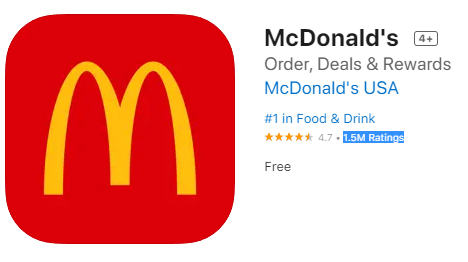

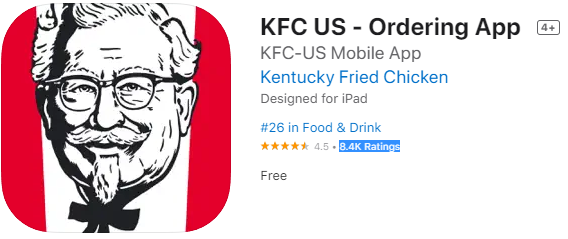

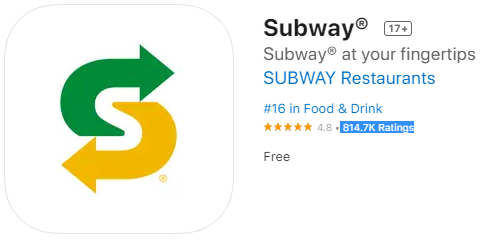

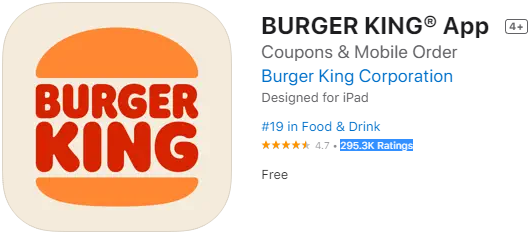

In [ ]:
mc_share = (1.5*(10**6))
kfc_share = (8.4*(10**3))
sby_share = (814.7*(10**3))
bk_share = (295.3*(10**3))
SOV_mc = (mc_share / (mc_share + kfc_share + sby_share + bk_share))*100
print(f"McDonald's share of voice = {round(SOV_mc,2)} %")
SOV_kfc = (kfc_share / (mc_share + kfc_share + sby_share + bk_share))*100
print(f"KFC share of voice = {round(SOV_kfc,2)} %")
SOV_sby = (sby_share / (mc_share + kfc_share + sby_share + bk_share))*100
print(f"Subway share of voice = {round(SOV_sby,2)} %")
SOV_bk = (bk_share / (mc_share + kfc_share + sby_share + bk_share))*100
print(f"Burger King share of voice = {round(SOV_bk,2)} %")

McDonald's share of voice = 57.29 %
KFCC share of voice = 0.32 %
Subway share of voice = 31.11 %
Burger King share of voice = 11.28 %


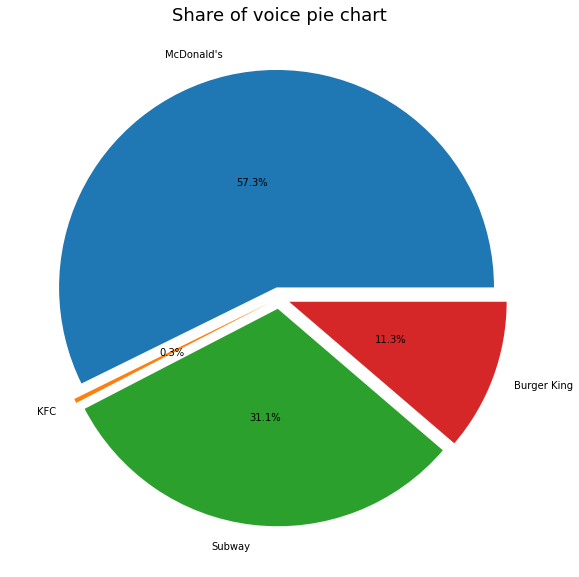

In [ ]:
df_companies_share = pd.DataFrame(data={'Companies': ["McDonald's", "KFC", "Subway", "Burger King"], 'Share': [mc_share, kfc_share, sby_share, bk_share]})

fig, ax = plt.subplots(figsize=(10,10))
labels = df_companies_share['Companies'].unique()
plt.pie(x=df_companies_share['Share'], autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Share of voice pie chart", fontsize=18);

We can see that McDonald's has the most shares

In [ ]:
df_from_pickle['Company_name'].unique()

array(['Subway', 'KFC', 'McDonalds', 'Burger King'], dtype=object)

In [ ]:
NPS_mc = ((df_from_pickle[(df_from_pickle['Company_name'] == 'McDonalds') & (df_from_pickle['polarity'] == 'Positive')].rating.count()
        - df_from_pickle[(df_from_pickle['Company_name'] == 'McDonalds') & (df_from_pickle['polarity'] == 'Negative')].rating.count()) 
        / df_from_pickle[(df_from_pickle['Company_name'] == 'McDonalds')].rating.count())*100
print(f"McDonald's NPS = {round(NPS_mc,2)} %")

McDonald's NPS = 13.05 %


In [ ]:
NPS_kfc = ((df_from_pickle[(df_from_pickle['Company_name'] == 'KFC') & (df_from_pickle['polarity'] == 'Positive')].rating.count()
        - df_from_pickle[(df_from_pickle['Company_name'] == 'KFC') & (df_from_pickle['polarity'] == 'Negative')].rating.count()) 
        / df_from_pickle[(df_from_pickle['Company_name'] == 'KFC')].rating.count())*100
print(f"KFC NPS = {round(NPS_kfc,2)} %")

KFC NPS = -4.03 %


In [ ]:
NPS_sby = ((df_from_pickle[(df_from_pickle['Company_name'] == 'Subway') & (df_from_pickle['polarity'] == 'Positive')].rating.count()
        - df_from_pickle[(df_from_pickle['Company_name'] == 'Subway') & (df_from_pickle['polarity'] == 'Negative')].rating.count()) 
        / df_from_pickle[(df_from_pickle['Company_name'] == 'Subway')].rating.count())*100
print(f"Subway NPS = {round(NPS_sby,2)} %")

Subway NPS = 28.84 %


In [ ]:
NPS_bk = ((df_from_pickle[(df_from_pickle['Company_name'] == 'Burger King') & (df_from_pickle['polarity'] == 'Positive')].rating.count()
        - df_from_pickle[(df_from_pickle['Company_name'] == 'Burger King') & (df_from_pickle['polarity'] == 'Negative')].rating.count()) 
        / df_from_pickle[(df_from_pickle['Company_name'] == 'Burger King')].rating.count())*100
print(f"Burger King NPS = {round(NPS_bk,2)} %")

Burger King NPS = 14.67 %


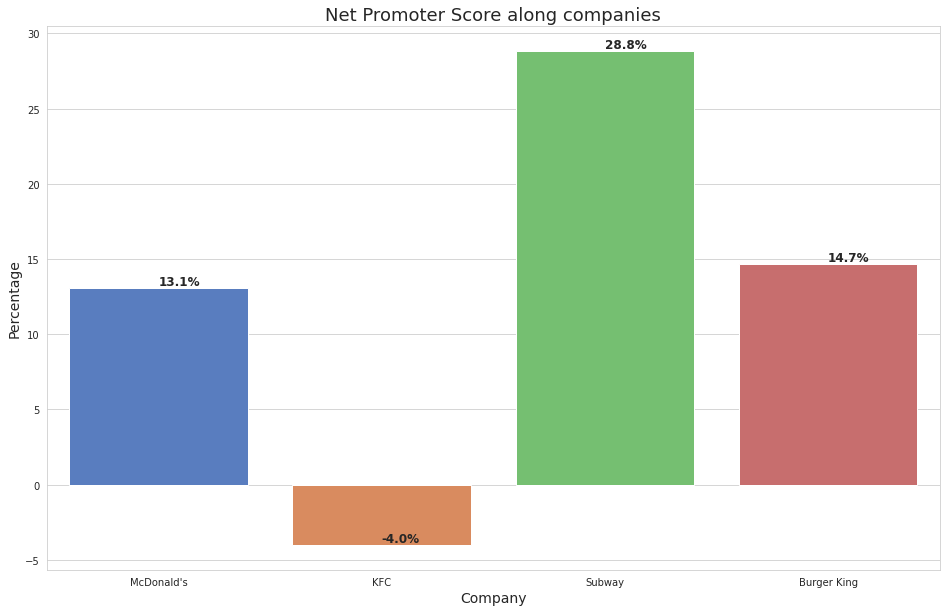

In [ ]:
df_companies_nps = pd.DataFrame(data={'Companies': ["McDonald's", "KFC", "Subway", "Burger King"], 'Share': [NPS_mc, NPS_kfc, NPS_sby, NPS_bk]})
df_companies_nps = df_companies_nps.set_index('Companies')
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x=df_companies_nps.index, y='Share', data=df_companies_nps, ci=None, palette="muted",orient='v')
ax.set_title("Net Promoter Score along companies", fontsize=18)
ax.set_xlabel ("Company", fontsize=14)
ax.set_ylabel ("Percentage", fontsize=14)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.2,"%.1f%%"% rect.get_height(), weight='bold',fontsize=12 )

# Topic modeling

In [ ]:
df_topic = pd.read_pickle("/content/drive/MyDrive/marketing task/df_renewed_pickle.pkl")  
df_topic.head()

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[use, application, lot, reward, program, use, ...",use application lot reward program use mobile ...
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, subwa...",already problem start desire order subway sand...
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...


In [ ]:
print(df_topic["review"][0])
print(df_topic["lemmatize_word_w_pos"][0])
print(df_topic["lemmatize_text"][0])

0    I used this app a lot for the rewards program,...
0    Since when has KFC had an app?! I feel the nee...
0    I work at a large hospital and walk by McDonal...
0    We are avid DoorDash customers and order from ...
Name: review, dtype: object
0    [use, application, lot, reward, program, use, ...
0    [since, kfc, application, feel, need, hop, cre...
0    [work, large, hospital, walk, mcdonalds, entra...
0    [avid, doordash, customer, order, sometimes, t...
Name: lemmatize_word_w_pos, dtype: object
0    use application lot reward program use mobile ...
0    since kfc application feel need hop creamtan l...
0    work large hospital walk mcdonalds entrance ho...
0    avid doordash customer order sometimes time we...
Name: lemmatize_text, dtype: object


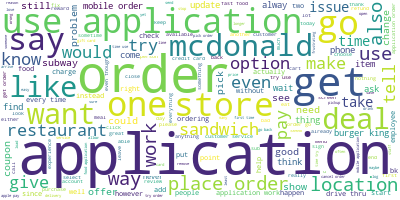

In [ ]:
stop = stopwords.words('english')
# Join the different processed titles together.
cloud = " ".join(cat for cat in df_topic.lemmatize_text)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop)
# Generate a word cloud
wordcloud.generate(cloud)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# enlarging stopwords
stop.extend(['subway', 'king', 'mcdonald', '“', '”', 'get', 'use', 'go', 'kfc', '’', 'sub', 'bk', 'way'])
df_topic['lemmatize_word_w_pos'] = df_topic['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop])

In [ ]:
df_topic['lemmatize_text'] = [' '.join(map(str, l)) for l in df_topic['lemmatize_word_w_pos']]

In [ ]:
df_topic['lemmatize_word_w_pos']

0       [application, lot, reward, program, mobile, or...
1       [especially, compare, competition, place, like...
2       [already, problem, start, desire, order, sandw...
3       [sign, pretty, painless, typically, frustrate,...
4       [place, order, 520pm, application, pickup, men...
                              ...                        
1995    [trouble, payment, application, never, problem...
1996    [application, user, friendly, delivery, fast, ...
1997    [probably, application, many, coupon, offer, a...
1998    [application, allow, place, order, delivery, a...
1999    [thank, much, add, apple, pay, supportagain, a...
Name: lemmatize_word_w_pos, Length: 6414, dtype: object

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(df_topic['lemmatize_word_w_pos'])

In [ ]:
print(id2word.token2id)

{'add': 0, 'additionally': 1, 'already': 2, 'also': 3, 'amount': 4, 'application': 5, 'automatically': 6, 'bread': 7, 'build': 8, 'cash': 9, 'course': 10, 'covid': 11, 'downside': 12, 'earn': 13, 'easy': 14, 'even': 15, 'expire': 16, 'family': 17, 'favorite': 18, 'find': 19, 'forget': 20, 'great': 21, 'indicate': 22, 'individually': 23, 'item': 24, 'last': 25, 'later': 26, 'le': 27, 'line': 28, 'lot': 29, 'love': 30, 'make': 31, 'meal': 32, 'meat': 33, 'menu': 34, 'mobile': 35, 'name': 36, 'next': 37, 'online': 38, 'order': 39, 'ordering': 40, 'payed': 41, 'perkwell': 42, 'person': 43, 'pick': 44, 'point': 45, 'program': 46, 'purchase': 47, 'put': 48, 'rather': 49, 'ready': 50, 'register': 51, 'regular': 52, 'restriction': 53, 'reward': 54, 'sauce': 55, 'select': 56, 'side': 57, 'since': 58, 'skip': 59, 'specific': 60, 'suit': 61, 'time': 62, 'token': 63, 'topping': 64, 'toward': 65, 'town': 66, 'turn': 67, 'want': 68, 'whether': 69, 'would': 70, 'accurate': 71, 'although': 72, 'appare

In [ ]:
id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [ ]:
print(id2word.token2id)

{'add': 0, 'already': 1, 'also': 2, 'amount': 3, 'automatically': 4, 'bread': 5, 'build': 6, 'cash': 7, 'course': 8, 'covid': 9, 'earn': 10, 'easy': 11, 'even': 12, 'expire': 13, 'family': 14, 'favorite': 15, 'find': 16, 'forget': 17, 'great': 18, 'indicate': 19, 'item': 20, 'last': 21, 'later': 22, 'le': 23, 'line': 24, 'lot': 25, 'love': 26, 'make': 27, 'meal': 28, 'meat': 29, 'menu': 30, 'mobile': 31, 'name': 32, 'next': 33, 'online': 34, 'ordering': 35, 'person': 36, 'pick': 37, 'point': 38, 'program': 39, 'purchase': 40, 'put': 41, 'rather': 42, 'ready': 43, 'register': 44, 'regular': 45, 'reward': 46, 'sauce': 47, 'select': 48, 'side': 49, 'since': 50, 'skip': 51, 'specific': 52, 'time': 53, 'topping': 54, 'town': 55, 'turn': 56, 'want': 57, 'whether': 58, 'would': 59, 'accurate': 60, 'although': 61, 'apparently': 62, 'attempt': 63, 'bell': 64, 'buggy': 65, 'card': 66, 'cart': 67, 'change': 68, 'chip': 69, 'compare': 70, 'correct': 71, 'credit': 72, 'drink': 73, 'end': 74, 'error

In [ ]:
# Create Corpus and term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in df_topic['lemmatize_word_w_pos']]
# View
print(corpus[2])

[(1, 1), (9, 1), (14, 3), (25, 1), (41, 1), (43, 1), (49, 1), (57, 1), (83, 1), (90, 1), (103, 1), (110, 2), (113, 1), (118, 4), (124, 1), (125, 3), (126, 1), (127, 1), (128, 2), (129, 3), (130, 1), (131, 2), (132, 3), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 1), (139, 1), (140, 1), (141, 1), (142, 1), (143, 1), (144, 2), (145, 1), (146, 1), (147, 1), (148, 1), (149, 2), (150, 1), (151, 1), (152, 2), (153, 1), (154, 1), (155, 1), (156, 2), (157, 1), (158, 1), (159, 3), (160, 3), (161, 1), (162, 1), (163, 1), (164, 2), (165, 1), (166, 1)]


In [ ]:
# human-readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('add', 1),
  ('already', 2),
  ('also', 1),
  ('amount', 2),
  ('automatically', 1),
  ('bread', 1),
  ('build', 1),
  ('cash', 1),
  ('course', 1),
  ('covid', 1),
  ('earn', 1),
  ('easy', 1),
  ('even', 2),
  ('expire', 1),
  ('family', 1),
  ('favorite', 2),
  ('find', 1),
  ('forget', 1),
  ('great', 2),
  ('indicate', 3),
  ('item', 4),
  ('last', 1),
  ('later', 1),
  ('le', 1),
  ('line', 2),
  ('lot', 1),
  ('love', 1),
  ('make', 3),
  ('meal', 1),
  ('meat', 1),
  ('menu', 1),
  ('mobile', 1),
  ('name', 1),
  ('next', 1),
  ('online', 1),
  ('ordering', 2),
  ('person', 1),
  ('pick', 1),
  ('point', 1),
  ('program', 1),
  ('purchase', 1),
  ('put', 1),
  ('rather', 1),
  ('ready', 1),
  ('register', 1),
  ('regular', 1),
  ('reward', 4),
  ('sauce', 1),
  ('select', 2),
  ('side', 1),
  ('since', 1),
  ('skip', 2),
  ('specific', 1),
  ('time', 2),
  ('topping', 2),
  ('town', 1),
  ('turn', 1),
  ('want', 1),
  ('whether', 1),
  ('would', 1)]]

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=50, num_topics=10, workers = 4, passes=10)

In [ ]:
lda_model.print_topics()

[(0,
  '0.030*"card" + 0.021*"pay" + 0.018*"place" + 0.017*"would" + 0.017*"time" + 0.017*"pick" + 0.015*"add" + 0.013*"restaurant" + 0.012*"work" + 0.011*"payment"'),
 (1,
  '0.044*"time" + 0.021*"location" + 0.016*"every" + 0.014*"make" + 0.013*"one" + 0.013*"food" + 0.011*"even" + 0.009*"restaurant" + 0.009*"like" + 0.009*"update"'),
 (2,
  '0.025*"email" + 0.021*"account" + 0.019*"sign" + 0.018*"try" + 0.015*"work" + 0.015*"card" + 0.014*"new" + 0.013*"update" + 0.013*"log" + 0.011*"password"'),
 (3,
  '0.023*"food" + 0.021*"mobile" + 0.021*"ordering" + 0.020*"always" + 0.017*"location" + 0.016*"make" + 0.014*"burger" + 0.013*"fast" + 0.012*"love" + 0.011*"like"'),
 (4,
  '0.034*"time" + 0.032*"wait" + 0.021*"drive" + 0.019*"minute" + 0.019*"food" + 0.013*"would" + 0.012*"place" + 0.012*"say" + 0.012*"store" + 0.012*"thru"'),
 (5,
  '0.021*"call" + 0.021*"store" + 0.020*"charge" + 0.020*"refund" + 0.018*"tell" + 0.017*"say" + 0.016*"customer" + 0.014*"food" + 0.013*"time" + 0.013*"

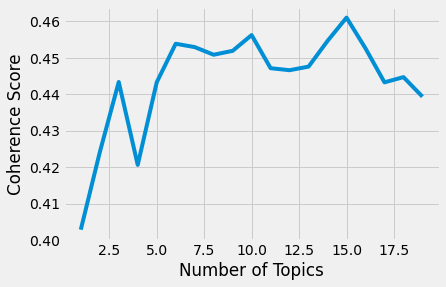

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df_from_pickle['lemmatize_word_w_pos'], corpus=corpus, dictionary=id2word, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(topics, score):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4028
Num Topics = 2  has Coherence Value of 0.4241
Num Topics = 3  has Coherence Value of 0.4434
Num Topics = 4  has Coherence Value of 0.4206
Num Topics = 5  has Coherence Value of 0.4433
Num Topics = 6  has Coherence Value of 0.4539
Num Topics = 7  has Coherence Value of 0.453
Num Topics = 8  has Coherence Value of 0.4509
Num Topics = 9  has Coherence Value of 0.4519
Num Topics = 10  has Coherence Value of 0.4563
Num Topics = 11  has Coherence Value of 0.4472
Num Topics = 12  has Coherence Value of 0.4466
Num Topics = 13  has Coherence Value of 0.4476
Num Topics = 14  has Coherence Value of 0.4547
Num Topics = 15  has Coherence Value of 0.4611
Num Topics = 16  has Coherence Value of 0.4526
Num Topics = 17  has Coherence Value of 0.4433
Num Topics = 18  has Coherence Value of 0.4447
Num Topics = 19  has Coherence Value of 0.4394


In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=50, num_topics=15, workers = 4, passes=10)

In [ ]:
lda_model.print_topics()

[(0,
  '0.026*"deal" + 0.023*"coupon" + 0.016*"location" + 0.015*"like" + 0.014*"make" + 0.014*"love" + 0.014*"one" + 0.013*"time" + 0.013*"burger" + 0.013*"good"'),
 (1,
  '0.033*"reward" + 0.027*"point" + 0.023*"work" + 0.017*"one" + 0.017*"free" + 0.016*"deal" + 0.012*"time" + 0.010*"update" + 0.010*"like" + 0.009*"purchase"'),
 (2,
  '0.035*"pick" + 0.034*"place" + 0.023*"time" + 0.022*"drive" + 0.016*"location" + 0.015*"phone" + 0.013*"say" + 0.011*"restaurant" + 0.011*"tell" + 0.011*"food"'),
 (3,
  '0.035*"try" + 0.031*"email" + 0.027*"sign" + 0.025*"account" + 0.020*"log" + 0.016*"password" + 0.016*"say" + 0.015*"even" + 0.014*"work" + 0.012*"time"'),
 (4,
  '0.035*"sandwich" + 0.025*"add" + 0.018*"time" + 0.018*"like" + 0.016*"option" + 0.015*"would" + 0.014*"want" + 0.013*"make" + 0.011*"food" + 0.009*"one"'),
 (5,
  '0.090*"card" + 0.041*"pay" + 0.029*"payment" + 0.028*"credit" + 0.019*"time" + 0.017*"try" + 0.016*"gift" + 0.014*"charge" + 0.011*"apple" + 0.011*"would"'),
 (

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.014604  0.054985       1        1  11.755887
0      0.081036 -0.036695       2        1  10.035970
2     -0.036831 -0.054416       3        1   8.247772
4      0.102115 -0.037431       4        1   8.118619
11    -0.005615 -0.044329       5        1   7.812581
12     0.131407  0.010345       6        1   7.271158
10    -0.022627 -0.119667       7        1   7.029027
3     -0.019584  0.118952       8        1   6.742961
5     -0.003580  0.058784       9        1   5.867069
13    -0.074554 -0.038455      10        1   5.724442
8     -0.123544  0.009204      11        1   5.328677
6     -0.067293 -0.035054      12        1   5.176585
1      0.004374  0.094286      13        1   5.051770
9      0.054944 -0.017920      14        1   3.567325
14    -0.034851  0.037410      15        1   2.270157, topic_info=         Term         Freq        Total Category  logprob  loglift
66       card  1486.000000  1486.000000  Default  30.0000  30.0000
403     email   813.000000   813.000000  Default  29.0000  29.0000
20       item  1218.000000  1218.000000  Default  28.0000  28.0000
46     reward   647.000000   647.000000  Default  27.0000  27.0000
156  sandwich  1461.000000  1461.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
294      week    31.788837   449.933438  Topic15  -5.1307   1.1353
154   problem    36.838781   987.900766  Topic15  -4.9832   0.4963
53       time    42.197748  4786.485243  Topic15  -4.8474  -0.9459
151     phone    34.998296   899.651901  Topic15  -5.0345   0.5386
59      would    34.347054  2667.857520  Topic15  -5.0533  -0.5672

[909 rows x 6 columns], token_table=      Topic      Freq Term
term                      
488       1  0.047696    1
488       2  0.459612    1
488       3  0.021680    1
488       4  0.043360    1
488       5  0.069375    1
...     ...       ...  ...
123      11  0.067535    ‘
123      12  0.047275    ‘
123      13  0.121564    ‘
123      14  0.006754    ‘
123      15  0.013507    ‘

[6271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 3, 5, 12, 13, 11, 4, 6, 14, 9, 7, 2, 10, 15])

In [ ]:
for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: deal coupon location like make love one time burger good
1: reward point work one free deal time update like purchase
2: pick place time drive location phone say restaurant tell food
3: try email sign account log password say even work time
4: sandwich add time like option would want make food one
5: card pay payment credit time try gift charge apple would
6: customer money give store say time service work take tell
7: time try work deal every say error even store issue
8: call contact time delivery say email tell charge issue store
9: store time want say show sandwich would put work make
10: wait store minute food line would time sandwich location say
11: time mobile restaurant food would wait drive minute ordering location
12: item option add drink offer one cart available make want
13: say tell refund food call customer charge never time would
14: service issue customer never point try food reward two bad


In [ ]:
lda_model[corpus][0]

[(0, 0.19999185),
 (1, 0.1777421),
 (4, 0.22318098),
 (9, 0.24358715),
 (10, 0.032092925),
 (12, 0.11608793)]

In [ ]:
df_topic['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(df_topic['lemmatize_word_w_pos']))]

In [ ]:
df_topic.head()

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,topic
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[application, lot, reward, program, mobile, or...",application lot reward program mobile ordering...,0
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...,3
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, sandw...",already problem start desire order sandwich on...,2
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...,3
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...,8


In [ ]:
df_topic.topic.value_counts()

0     1800
2      862
1      700
4      690
3      551
7      426
5      422
6      248
10     177
8      161
9      121
12     109
11      93
13      38
14      16
Name: topic, dtype: int64

In [ ]:
def draw_word_cloud(index):
  topk = lda_model.show_topic(index, 20)
  topk_words = [ w for w, _ in topk ] 
  cloud = ' '.join(topk_words)
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop)
  wordcloud.generate(cloud)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

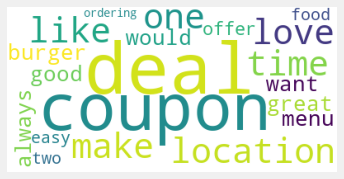

In [ ]:
draw_word_cloud(0)

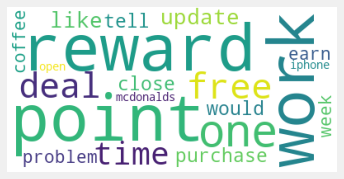

In [ ]:
draw_word_cloud(1)

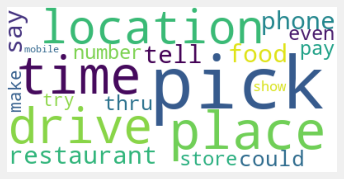

In [ ]:
draw_word_cloud(2)

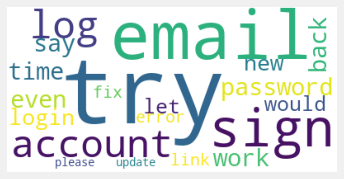

In [ ]:
draw_word_cloud(3)

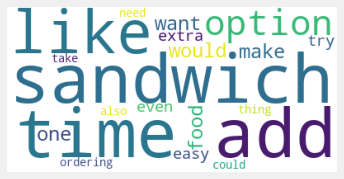

In [ ]:
draw_word_cloud(4)

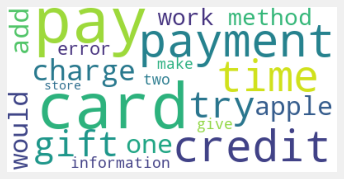

In [ ]:
draw_word_cloud(5)

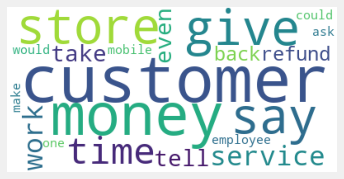

In [ ]:
draw_word_cloud(6)

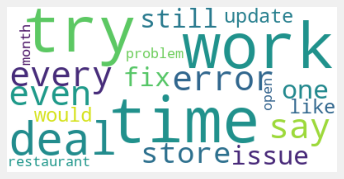

In [ ]:
draw_word_cloud(7)

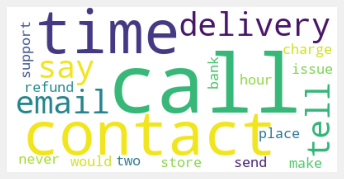

In [ ]:
draw_word_cloud(8)

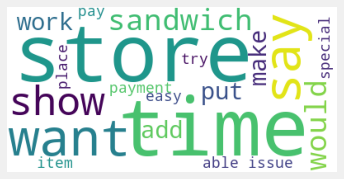

In [ ]:
draw_word_cloud(9)

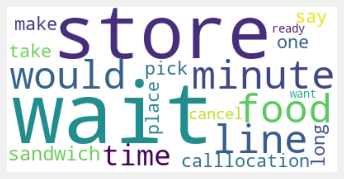

In [ ]:
draw_word_cloud(10)

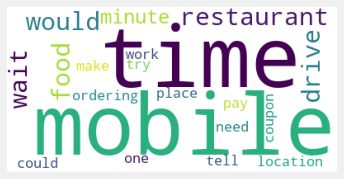

In [ ]:
draw_word_cloud(11)

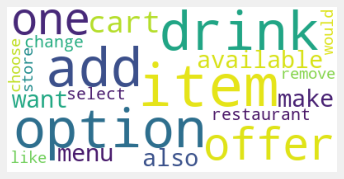

In [ ]:
draw_word_cloud(12)

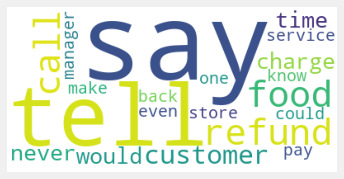

In [ ]:
draw_word_cloud(13)

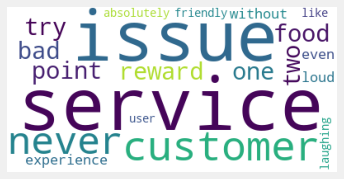

In [ ]:
draw_word_cloud(14)

In [ ]:
x=lda_model.show_topics(num_topics=15, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

0::['deal', 'coupon', 'location', 'like', 'make', 'love', 'one', 'time', 'burger', 'good']
1::['reward', 'point', 'work', 'one', 'free', 'deal', 'time', 'update', 'like', 'purchase']
2::['pick', 'place', 'time', 'drive', 'location', 'phone', 'say', 'restaurant', 'tell', 'food']
3::['try', 'email', 'sign', 'account', 'log', 'password', 'say', 'even', 'work', 'time']
4::['sandwich', 'add', 'time', 'like', 'option', 'would', 'want', 'make', 'food', 'one']
5::['card', 'pay', 'payment', 'credit', 'time', 'try', 'gift', 'charge', 'apple', 'would']
6::['customer', 'money', 'give', 'store', 'say', 'time', 'service', 'work', 'take', 'tell']
7::['time', 'try', 'work', 'deal', 'every', 'say', 'error', 'even', 'store', 'issue']
8::['call', 'contact', 'time', 'delivery', 'say', 'email', 'tell', 'charge', 'issue', 'store']
9::['store', 'time', 'want', 'say', 'show', 'sandwich', 'would', 'put', 'work', 'make']
10::['wait', 'store', 'minute', 'food', 'line', 'would', 'time', 'sandwich', 'location', 's

In [ ]:
topics_mapping = pd.DataFrame(topics_words, columns =['topic', 'top_words'])

In [ ]:
topics_mapping.head()

,topic,top_words
0,0,"[deal, coupon, location, like, make, love, one..."
1,1,"[reward, point, work, one, free, deal, time, u..."
2,2,"[pick, place, time, drive, location, phone, sa..."
3,3,"[try, email, sign, account, log, password, say..."
4,4,"[sandwich, add, time, like, option, would, wan..."


In [ ]:
merged = df_topic.join(topics_mapping.set_index('topic'), on='topic')

In [ ]:
merged.head()

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,review_clean,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,topic,top_words
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",Subway,NaN,NaN,NaN,i used this application a lot for the rewards ...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[application, lot, reward, program, mobile, or...",application lot reward program mobile ordering...,0,"[deal, coupon, location, like, make, love, one..."
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,Subway,NaN,NaN,NaN,especially compared to the competition places ...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...,3,"[try, email, sign, account, log, password, say..."
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,Subway,NaN,NaN,NaN,so i already had problems from the start of my...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, sandw...",already problem start desire order sandwich on...,2,"[pick, place, time, drive, location, phone, sa..."
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,Subway,NaN,NaN,NaN,i just signed up and it was pretty painless i ...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...,3,"[try, email, sign, account, log, password, say..."
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,Subway,NaN,NaN,NaN,placed an order at 520pm on the application fo...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...,8,"[call, contact, time, delivery, say, email, te..."


In [ ]:
final_df = merged.join(df_from_pickle[['review', 'polarity_score', 'polarity']].set_index('review'), on='review')

In [ ]:
final_df.head()

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,...,tokenized,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,topic,top_words,polarity_score,polarity
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",Subway,NaN,NaN,NaN,...,"[i, used, this, application, a, lot, for, the,...","[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[application, lot, reward, program, mobile, or...",application lot reward program mobile ordering...,0,"[deal, coupon, location, like, make, love, one...",0.9871,Positive
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,Subway,NaN,NaN,NaN,...,"[especially, compared, to, the, competition, p...","[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...,3,"[try, email, sign, account, log, password, say...",0.8767,Positive
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,Subway,NaN,NaN,NaN,...,"[so, i, already, had, problems, from, the, sta...","[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, sandw...",already problem start desire order sandwich on...,2,"[pick, place, time, drive, location, phone, sa...",0.1821,Neutral
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,Subway,NaN,NaN,NaN,...,"[i, just, signed, up, and, it, was, pretty, pa...","[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...,3,"[try, email, sign, account, log, password, say...",0.9903,Positive
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,Subway,NaN,NaN,NaN,...,"[placed, an, order, at, 520pm, on, the, applic...","[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...,8,"[call, contact, time, delivery, say, email, te...",-0.9736,Negative


In [ ]:
topic_class_dictionary ={0 : 'customer service', 1 : 'customer service', 2 : 'delivery', 8 : 'delivery', 3 : 'signing up', 4 : 'formation of order', 9 : 'formation of order', 12 : 'formation of order', 5: 'payment by cards', 6 : 'money policy', 13 : 'money policy', 7 : 'technical issues', 14 : 'technical issues', 10 : 'order availability', 11: 'drive through'}
 
final_df['topic_class'] = final_df['topic'].map(topic_class_dictionary)

In [ ]:
final_df.head()

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,...,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,topic,top_words,polarity_score,polarity,topic_class
0,Convinient and has rewards,False,Godspeed2302,2020-12-05 19:09:04,5,"I used this app a lot for the rewards program,...",Subway,NaN,NaN,NaN,...,"[used, application, lot, rewards, program, use...","[use, applic, lot, reward, program, use, mobil...","[(used, v), (application, n), (lot, n), (rewar...","[application, lot, reward, program, mobile, or...",application lot reward program mobile ordering...,0,"[deal, coupon, location, like, make, love, one...",0.9871,Positive,customer service
1,Not great...,False,csfrost1986,2020-12-13 22:54:17,2,Especially compared to the competition (places...,Subway,NaN,NaN,NaN,...,"[especially, compared, competition, places, li...","[especi, compar, competit, place, like, taco, ...","[(especially, r), (compared, v), (competition,...","[especially, compare, competition, place, like...",especially compare competition place like taco...,3,"[try, email, sign, account, log, password, say...",0.8767,Positive,signing up
2,“Just wait a hot minute” says the girl who…,False,Maxswiggy,2021-12-31 01:22:42,3,So I already had problems from the start of my...,Subway,NaN,NaN,NaN,...,"[already, problems, start, desire, order, subw...","[alreadi, problem, start, desir, order, subway...","[(already, r), (problems, n), (start, v), (des...","[already, problem, start, desire, order, sandw...",already problem start desire order sandwich on...,2,"[pick, place, time, drive, location, phone, sa...",0.1821,Neutral,delivery
3,A beginner,False,Keely Maltby,2021-06-21 04:23:53,4,I just signed up and it was pretty painless. I...,Subway,NaN,NaN,NaN,...,"[signed, pretty, painless, typically, frustrat...","[sign, pretti, painless, typic, frustrat, time...","[(signed, v), (pretty, a), (painless, n), (typ...","[sign, pretty, painless, typically, frustrate,...",sign pretty painless typically frustrate time ...,3,"[try, email, sign, account, log, password, say...",0.9903,Positive,signing up
4,Absolute Garbage,False,MJSinNEW,2020-04-16 01:15:27,1,Placed an order at 5:20pm on the app for picku...,Subway,NaN,NaN,NaN,...,"[placed, order, 520pm, application, pickup, me...","[place, order, 520pm, applic, pickup, menomine...","[(placed, v), (order, n), (520pm, n), (applica...","[place, order, 520pm, application, pickup, men...",place order 520pm application pickup menominee...,8,"[call, contact, time, delivery, say, email, te...",-0.9736,Negative,delivery


In [ ]:
McDonalds_final_df = final_df[final_df['Company_name'] == 'McDonalds']
McDonalds_final_df.head()

,title,isEdited,userName,date,rating,review,Company_name,developerId,developerBody,developerModified,...,stopwords_removed,snowball_stemmer,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text,topic,top_words,polarity_score,polarity,topic_class
0,Terrible service,False,Christa@TGH,2020-07-02 13:47:03,5,I work at a large hospital and walk by McDonal...,McDonalds,NaN,NaN,NaN,...,"[work, large, hospital, walk, mcdonalds, entra...","[work, larg, hospit, walk, mcdonald, entranc, ...","[(work, n), (large, a), (hospital, n), (walk, ...","[work, large, hospital, walk, mcdonalds, entra...",work large hospital walk mcdonalds entrance ho...,2,"[pick, place, time, drive, location, phone, sa...",-0.6054,Negative,delivery
1,Frequent user,False,AndreaBurns3,2022-11-02 17:52:33,3,"As a busy graduate student, this app was a lif...",McDonalds,NaN,NaN,NaN,...,"[busy, graduate, student, application, life, s...","[busi, graduat, student, applic, life, saver, ...","[(busy, a), (graduate, n), (student, n), (appl...","[busy, graduate, student, application, life, s...",busy graduate student application life saver c...,0,"[deal, coupon, location, like, make, love, one...",-0.9485,Negative,customer service
2,Don’t turn your screen off,False,Jennysub,2021-08-11 15:33:01,2,I recently had to place an order three times b...,McDonalds,NaN,NaN,NaN,...,"[recently, place, order, three, times, applica...","[recent, place, order, three, time, applic, ti...","[(recently, r), (place, n), (order, n), (three...","[recently, place, order, three, time, applicat...",recently place order three time application ti...,2,"[pick, place, time, drive, location, phone, sa...",0.0426,Neutral,delivery
3,Unable to Even Use the App,False,Ashhart1020,2021-04-16 17:23:43,1,I don’t even know what more to do about this a...,McDonalds,NaN,NaN,NaN,...,"[even, know, application, guess, ever, get, us...","[even, know, applic, guess, ever, get, use, da...","[(even, r), (know, v), (application, n), (gues...","[even, know, application, guess, ever, daily, ...",even know application guess ever daily deal mo...,3,"[try, email, sign, account, log, password, say...",-0.8957,Negative,signing up
4,"Terribly designed app, many stores not fully t...",False,$aver of cash,2021-09-28 00:13:38,2,"For starters, I’m generally against fast food ...",McDonalds,25556930.0,We want to make the best Mobile App we can. He...,2021-10-07T21:52:33Z,...,"[starters, generally, fast, food, applications...","[starter, general, fast, food, applic, typic, ...","[(starters, n), (generally, r), (fast, a), (fo...","[starter, generally, fast, food, application, ...",starter generally fast food application typica...,0,"[deal, coupon, location, like, make, love, one...",0.9891,Positive,customer service


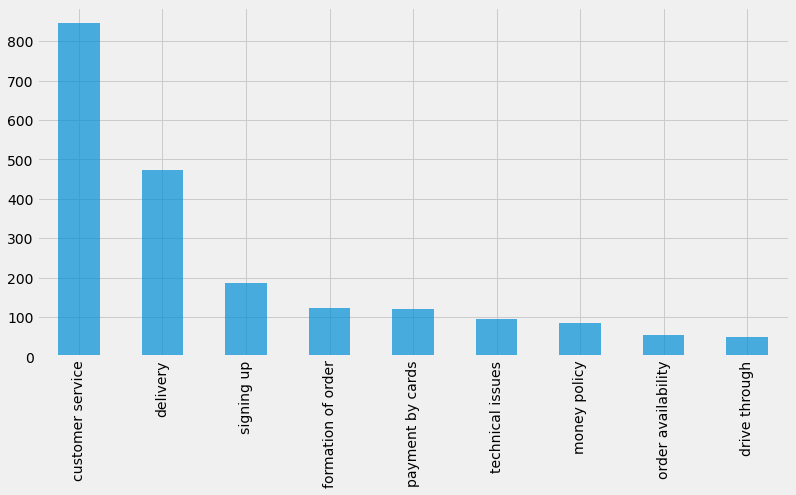

In [ ]:
McDonalds_final_df['topic_class'].value_counts().plot(kind='bar', figsize=(12,6), alpha=0.7)

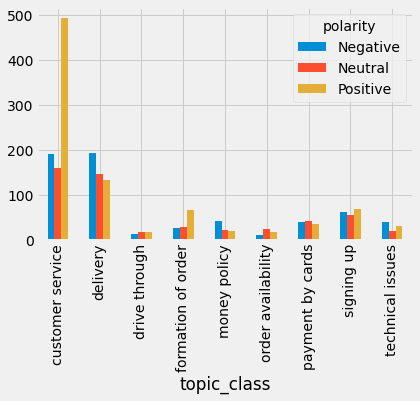

In [ ]:
McDonalds_final_df.groupby('topic_class').polarity.value_counts().unstack().plot(kind='bar', layout=(2,2))

In [ ]:
Burger_King_final_df = final_df[final_df['Company_name'] == 'Burger King']
Subway_final_df = final_df[final_df['Company_name'] == 'Subway']
KFC_final_df = final_df[final_df['Company_name'] == 'KFC']

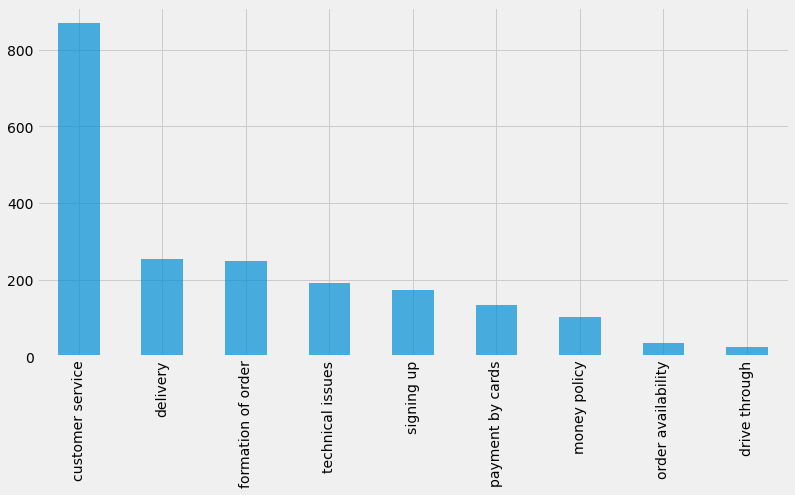

In [ ]:
Burger_King_final_df['topic_class'].value_counts().plot(kind='bar', figsize=(12,6), alpha=0.7)

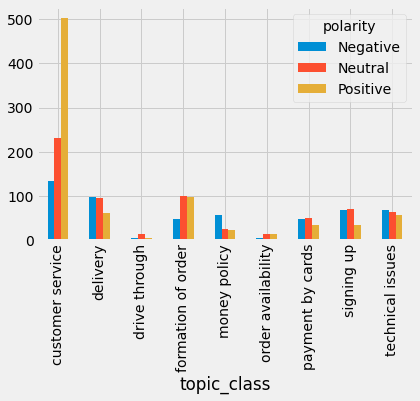

In [ ]:
Burger_King_final_df.groupby('topic_class').polarity.value_counts().unstack().plot(kind='bar', layout=(2,2))

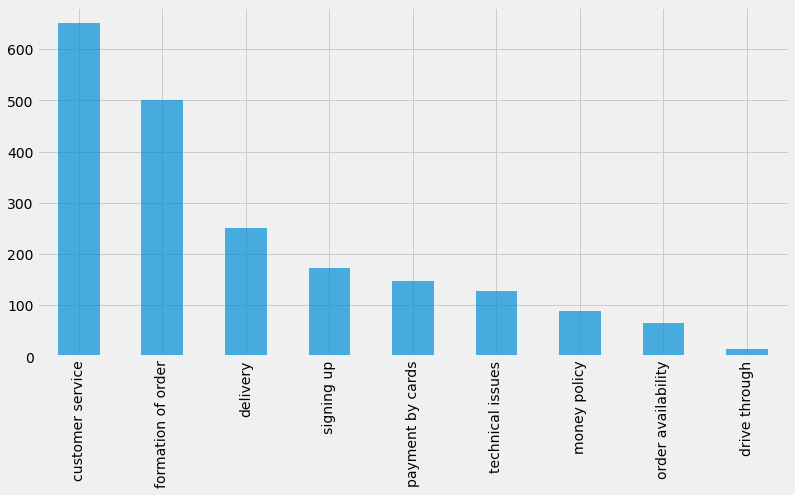

In [ ]:
Subway_final_df['topic_class'].value_counts().plot(kind='bar', figsize=(12,6), alpha=0.7)

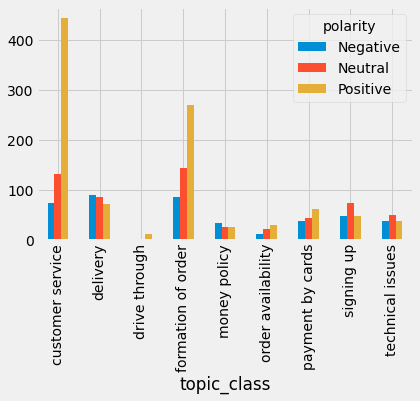

In [ ]:
Subway_final_df.groupby('topic_class').polarity.value_counts().unstack().plot(kind='bar', layout=(2,2))

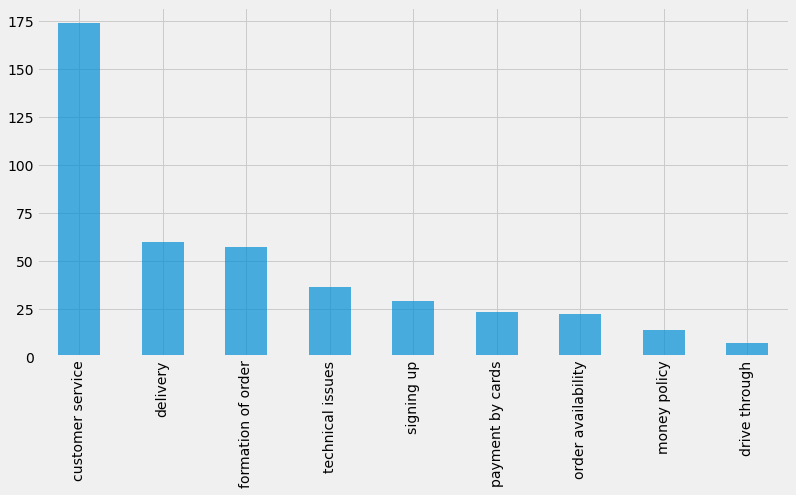

In [ ]:
KFC_final_df['topic_class'].value_counts().plot(kind='bar', figsize=(12,6), alpha=0.7)

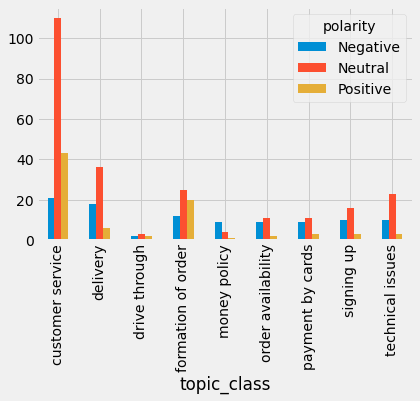

In [ ]:
KFC_final_df.groupby('topic_class').polarity.value_counts().unstack().plot(kind='bar', layout=(2,2))

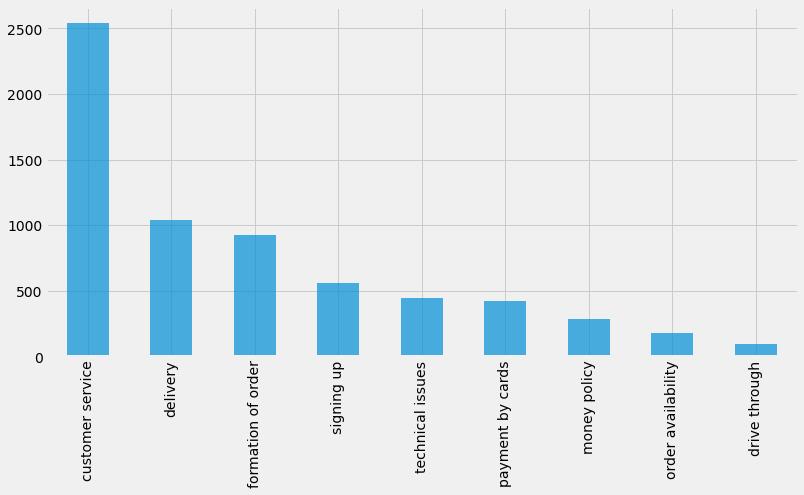

In [ ]:
final_df['topic_class'].value_counts().plot(kind='bar', figsize=(12,6), alpha=0.7)

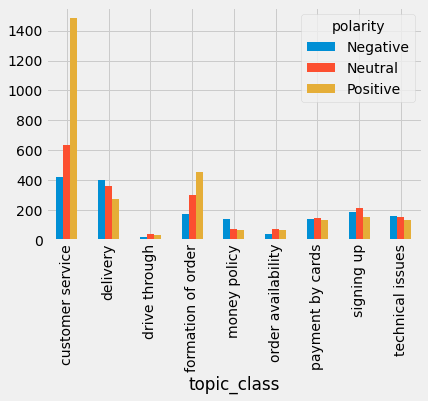

In [ ]:
final_df.groupby('topic_class').polarity.value_counts().unstack().plot(kind='bar', layout=(2,2))

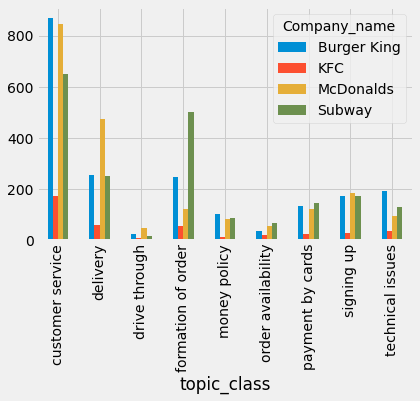

In [ ]:
final_df.groupby('topic_class').Company_name.value_counts().unstack().plot(kind='bar', layout=(2,2))

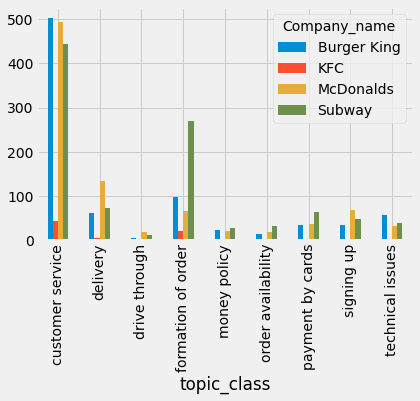

In [ ]:
final_df[final_df['polarity'] == 'Positive'].groupby('topic_class').Company_name.value_counts().unstack().plot(kind='bar', layout=(2,2))

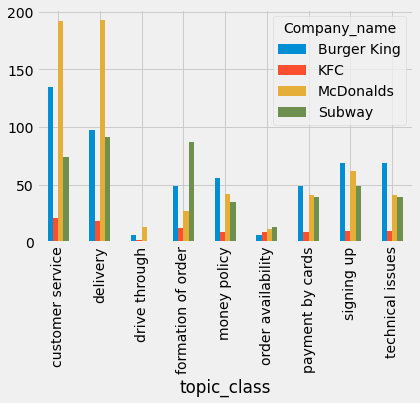

In [ ]:
final_df[final_df['polarity'] == 'Negative'].groupby('topic_class').Company_name.value_counts().unstack().plot(kind='bar', layout=(2,2))

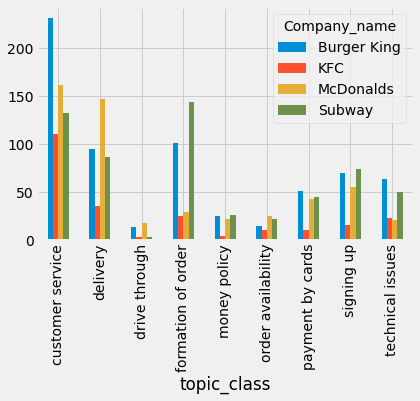

In [ ]:
final_df[final_df['polarity'] == 'Neutral'].groupby('topic_class').Company_name.value_counts().unstack().plot(kind='bar', layout=(2,2))